In [1]:
import pandas as pd
pd.set_option('display.max_columns', 60)

import numpy as np
import re
import json
from pathlib import Path
import re

import matplotlib.pyplot as plt
import scipy.stats as st

from master_thesis.src import utils

## Reading in data files

In [2]:
print(utils.DATA)

/home/ruecker/data/Daten_INWT/201103_dataNLP


In [3]:
#bonn = utils.read_data('201001_Bonn.txt')                  # Generalanzeiger Bonn
#NOZ = utils.read_data('201001_NOZ.txt')                    # Neue Osnabrücker Zeitung
#aachener = utils.read_data('201001_aachener_zeitung.txt')  # Aachener Zeitung
#SZ = utils.read_data('201001_SZ.txt')                      # Saarbrücker Zeitung
#TV = utils.read_data('201001_TV.txt')                      # Trierscher Volksfreund

In [4]:
bonn = utils.read_data('201103_Bonn.txt')                  # Generalanzeiger Bonn
aachener = utils.read_data('201103_aachener_zeitung.txt')  # Aachener Zeitung
SZ = utils.read_data('201103_SZ.txt')                      # Saarbrücker Zeitung
TV = utils.read_data('201103_TV.txt')                      # Trierscher Volksfreund

In [5]:
# 1. Datensatz:
# ((17534, 51), (20525, 51), (16965, 51), (26050, 51), (22972, 51))
# 2. Datensatz: (neu: Spalten 'ausreisser', 'zeilen')
# ((20015, 53), (22780, 53), (19596, 53), (28274, 53), (26180, 53))
# 3. Datensatz: (neu: Spalten 'txtExists', 'textCrawling')
# ((15940, 55), (14388, 55), (17366, 55), (17439, 55), (19754, 55))

In [6]:
#bonn.shape, NOZ.shape, aachener.shape, SZ.shape, TV.shape
# neu: Spalten 'prozentDpa', 'prozentVerlag'

In [7]:
bonn.shape, aachener.shape, SZ.shape, TV.shape
# neu: Spalten 'txtExists', textCrawling'

((2769, 57), (2181, 57), (1791, 57), (1079, 57))

In [8]:
aachener[aachener.txtExists == True].head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49318965,89,29,39,24,2498,NaN,49.960000,56.179775,32.584270,26.966292,100,1,65,9,7,3,18,37,nrw-region,NaN,NaN,armin-laschet-erhaelt-israel-jacobson-preis-2020,https://www.aachener-zeitung.de/nrw-region/arm...,200301-99-142653,18,63,42,dpacat:pl,2020-03-02 14:03:47,NaN,Meldung,NaN,NaN,CDU,NaN,NaN,Israel-Jacobsen-Preis,NaN,"dpasrv:bid__,__dpasrv:bdt",Auszeichnungen,Auszeichnung und Preis,dpasubject:516,NaN,Berlin/Düsseldorf (dpa) - Die Union progressiv...,Laschet erhält Preis der Union progressiver Juden,NaN,3,NaN,137,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Israel Jacobson (1768 – 1828) gehörte zu den B...
49321583,1750,1257,1365,1112,94072,NaN,244.342857,22.000000,71.828571,63.542857,100,1,1302,32,15,13,10,70,ratgeber,gesundheit,NaN,coronavirus-was-tun,https://www.aachener-zeitung.de/ratgeber/gesun...,200302-99-150958,99,99,70,dpacat:vm,2020-03-02 15:08:00,NaN,Fragen & Antworten,Deutschland,NaN,"Ratgeber__,__Verbraucher__,__Coronavirus__,__C...",NaN,NaN,Fragen und Antworten des Robert-Koch-Instituts...,NaN,dpasrv:tmn,Gesundheit,"Medizin, Gesundheit",dpasubject:346,Auch in Deutschland steigt die Zahl der bekann...,Berlin (dpa/tmn) - Der neuartige Coronavirus S...,Ansteckung und Vorbeugung: Der Alltag mit Covi...,NaN,3,NaN,882,vm,1,NewsML-G2,2020-04-21 19:33:11,1,nein,True,"Kratzen im Hals, Schnupfen, Fieber. Wo man nor..."
49333599,265,138,140,110,8957,NaN,71.656000,47.169811,52.075472,41.509434,100,1,198,14,9,6,16,45,nrw-region,NaN,NaN,stellenabbau-bei-karstadt-kaufhof-praktisch-ab...,https://www.aachener-zeitung.de/nrw-region/ste...,200302-99-161647,27,100,69,dpacat:wi,2020-03-03 03:00:11,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:wap-nwf__,__dpasrv:nwf__,__dpasrv:edi__...",Einzelhandel,Konsumgüter,medtop:20000252,NaN,Düsseldorf (dpa) - Der nach der Fusion der War...,Benko: Stellenabbau bei Karstadt Kaufhof prakt...,NaN,4,NaN,242,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,"Der Unternehmer bekräftigte, er sei überzeugt,..."
49333693,2619,2003,2158,1822,139828,NaN,303.314534,17.602138,76.479572,69.568538,100,1,1687,35,17,15,9,76,ratgeber,bildung-beruf,NaN,coronavirus-welche-regeln-gelten-im-betrieb,https://www.aachener-zeitung.de/ratgeber/bildu...,200302-99-153044,86,100,76,dpacat:vm,2020-03-03 07:00:04,NaN,Fragen & Antworten,Deutschland,NaN,"Beruf__,__Recht__,__Ratgeber__,__Gesundheit__,...",NaN,NaN,"Bund-Verlag zum Corona-Virus__,__DGB Rechtssch...",NaN,dpasrv:tmn,Arbeit,"Arbeit, Soziales",dpasubject:345,Die Verbreitung des neuartigen Coronavirus bet...,Frankfurt/Main/Düsseldorf (dpa/tmn) - Nachdem ...,Covid-19: Welche Regeln gelten im Betrieb?,NaN,4,NaN,768,vm,1,NewsML-G2,2020-04-21 19:33:11,1,nein,True,"Wer Angst hat, sich am Arbeitsplatz oder außer..."
49340915,12785,6247,7938,5609,351299,NaN,72.477615,37.911615,48.861948,43.871725,100,1,7231,50,9,4,14,77,nrw-region,NaN,NaN,aachen-weicht-von-empfehlung-fuer-coronavirus-...,https://www.aachener-zeitung.de/nrw-region/aac...,200303-99-169319,22,98,63,dpacat:vm,2020-03-03 13:04:34,NaN,Meldung,Deutschland,NaN,Covid-19,NaN,NaN,NaN,NaN,"dpasrv:bid__,__dpasrv:bdt","Krankheit__,__Gesundheit__,__Wissenschaft","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",NaN,Aachen (dpa/lnw) - Die Stadt und die Region Aa...,Aachen weicht von RKI-Empfehlung ab - Krankenh...,NaN,4,NaN,196,vm,0,New

In [9]:
print(bonn.txtExists.value_counts())
print(aachener.txtExists.value_counts())
print(SZ.txtExists.value_counts())
print(TV.txtExists.value_counts())

True     1455
False    1314
Name: txtExists, dtype: int64
False    1360
True      821
Name: txtExists, dtype: int64
False    1115
True      676
Name: txtExists, dtype: int64
False    890
True     189
Name: txtExists, dtype: int64


In [10]:
1455+821+676+189

3141

In [11]:
bonn.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'txtExists',
       'textCrawling'],
      dtype='object')

## Before concatenation: add a column with info about which publisher

In [12]:
bonn['publisher'] = 'bonn'
#NOZ['publisher'] = 'NOZ'
aachener['publisher'] = 'aachener'
SZ['publisher'] = 'SZ'
TV['publisher'] = 'TV'

In [13]:
#bonn.columns == NOZ.columns
#NOZ.columns == aachener.columns 
aachener.columns == SZ.columns
SZ.columns == TV.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

## Concatenating all

In [14]:
#combined = pd.concat([bonn, NOZ, aachener, SZ, TV], axis=0)
combined = pd.concat([bonn, aachener, SZ, TV], axis=0)

In [15]:
combined.shape

(7820, 58)

In [16]:
i_list = combined.index
i_set = set(i_list)
print(len(i_list))
print(len(i_set)) # all different IDs, good!

7820
7820


In [17]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7820 entries, 49297055 to 53515215
Data columns (total 58 columns):
pageviews              7820 non-null int64
entrances              7820 non-null int64
exits                  7820 non-null int64
bounces                7820 non-null int64
timeOnPage             7820 non-null int64
conversions            0 non-null float64
avgTimeOnPage          7820 non-null float64
stickiness             7820 non-null float64
entranceRate           7820 non-null float64
bounceRate             7820 non-null float64
sharePageviews         7820 non-null int64
n                      7820 non-null int64
nObs                   7820 non-null int64
score_pageviews        7820 non-null int64
score_avgTimeOnPage    7820 non-null int64
score_entranceRate     7820 non-null int64
score_stickiness       7820 non-null int64
SCORE                  7820 non-null int64
kategorie              7820 non-null object
rubrik                 6123 non-null object
subRubrik    

In [18]:
combined.describe().round(2)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,zeilen,prozentDpa,prozentVerlag,flextags,importance,lifetime,limbic,titelH3,urgency,wikidata,wordcount,ratgeber,nLoadAttempts
count,7820.00,7820.00,7820.00,7820.00,7820.00,0.0,7820.00,7820.00,7820.00,7820.00,7820.0,7820.0,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,0.0,0.0,0.0,0.0,0.0,7820.00,0.0,7820.00,7820.00,7820.0
mean,1582.90,864.16,936.17,440.35,83476.17,NaN,127.14,51.37,40.12,18.46,100.0,1.0,466.97,19.47,11.71,5.26,16.57,53.01,49.16,90.27,65.81,NaN,NaN,NaN,NaN,NaN,3.48,NaN,402.01,0.03,1.0
std,16779.73,8998.08,9568.71,5244.10,969728.17,NaN,57.39,15.43,20.96,17.50,0.0,0.0,3220.22,10.53,2.65,4.14,2.93,11.17,32.50,21.77,16.65,NaN,NaN,NaN,NaN,NaN,0.57,NaN,280.39,0.18,0.0
min,56.00,1.00,3.00,0.00,365.00,NaN,4.57,3.48,1.27,0.00,100.0,1.0,4.00,6.00,1.00,1.00,3.00,29.00,1.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,2.00,NaN,26.00,0.00,1.0
25%,142.00,36.00,57.00,12.00,8759.75,NaN,84.64,38.85,21.59,4.30,100.0,1.0,93.00,11.00,10.00,2.00,14.00,45.00,24.00,96.00,58.00,NaN,NaN,NaN,NaN,NaN,3.00,NaN,191.00,0.00,1.0
50%,290.50,105.50,136.00,39.00,17545.00,NaN,126.02,52.48,38.95,12.43,100.0,1.0,167.00,15.00,13.00,4.00,17.00,49.00,44.00,99.00,70.00,NaN,NaN,NaN,NaN,NaN,3.00,NaN,336.00,0.00,1.0
75%,871.00,438.00,490.25,130.00,44459.00,NaN,164.84,63.76,58.27,28.51,100.0,1.0,373.00,28.00,13.00,8.00,19.00,61.00,69.00,100.00,78.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,585.00,0.00,1.0
max,1087521.00,522197.00,552468.00,385910.00,56101893.00,NaN,439.75,97.05,96.62,94.34,100.0,1.0,220789.00,50.00,18.00,20.00,20.00,93.00,425.00,100.00,96.00,NaN,NaN,NaN,NaN,NaN,5.00,NaN,3263.00,1.00,1.0


## One sample

In [19]:
print(combined.iloc[123])
print(combined.iloc[123].pagePath)

pageviews                                                             73
entrances                                                             19
exits                                                                 20
bounces                                                                9
timeOnPage                                                          4025
conversions                                                          NaN
avgTimeOnPage                                                    75.9434
stickiness                                                       72.6027
entranceRate                                                     26.0274
bounceRate                                                       12.3288
sharePageviews                                                       100
n                                                                      1
nObs                                                                  51
score_pageviews                                    

In [20]:
combined.info()
#df_raw = raw.fillna('') # replacing Nan with emtpy string

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7820 entries, 49297055 to 53515215
Data columns (total 58 columns):
pageviews              7820 non-null int64
entrances              7820 non-null int64
exits                  7820 non-null int64
bounces                7820 non-null int64
timeOnPage             7820 non-null int64
conversions            0 non-null float64
avgTimeOnPage          7820 non-null float64
stickiness             7820 non-null float64
entranceRate           7820 non-null float64
bounceRate             7820 non-null float64
sharePageviews         7820 non-null int64
n                      7820 non-null int64
nObs                   7820 non-null int64
score_pageviews        7820 non-null int64
score_avgTimeOnPage    7820 non-null int64
score_entranceRate     7820 non-null int64
score_stickiness       7820 non-null int64
SCORE                  7820 non-null int64
kategorie              7820 non-null object
rubrik                 6123 non-null object
subRubrik    

In [21]:
combined.describe().round(2)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,zeilen,prozentDpa,prozentVerlag,flextags,importance,lifetime,limbic,titelH3,urgency,wikidata,wordcount,ratgeber,nLoadAttempts
count,7820.00,7820.00,7820.00,7820.00,7820.00,0.0,7820.00,7820.00,7820.00,7820.00,7820.0,7820.0,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,7820.00,0.0,0.0,0.0,0.0,0.0,7820.00,0.0,7820.00,7820.00,7820.0
mean,1582.90,864.16,936.17,440.35,83476.17,NaN,127.14,51.37,40.12,18.46,100.0,1.0,466.97,19.47,11.71,5.26,16.57,53.01,49.16,90.27,65.81,NaN,NaN,NaN,NaN,NaN,3.48,NaN,402.01,0.03,1.0
std,16779.73,8998.08,9568.71,5244.10,969728.17,NaN,57.39,15.43,20.96,17.50,0.0,0.0,3220.22,10.53,2.65,4.14,2.93,11.17,32.50,21.77,16.65,NaN,NaN,NaN,NaN,NaN,0.57,NaN,280.39,0.18,0.0
min,56.00,1.00,3.00,0.00,365.00,NaN,4.57,3.48,1.27,0.00,100.0,1.0,4.00,6.00,1.00,1.00,3.00,29.00,1.00,2.00,2.00,NaN,NaN,NaN,NaN,NaN,2.00,NaN,26.00,0.00,1.0
25%,142.00,36.00,57.00,12.00,8759.75,NaN,84.64,38.85,21.59,4.30,100.0,1.0,93.00,11.00,10.00,2.00,14.00,45.00,24.00,96.00,58.00,NaN,NaN,NaN,NaN,NaN,3.00,NaN,191.00,0.00,1.0
50%,290.50,105.50,136.00,39.00,17545.00,NaN,126.02,52.48,38.95,12.43,100.0,1.0,167.00,15.00,13.00,4.00,17.00,49.00,44.00,99.00,70.00,NaN,NaN,NaN,NaN,NaN,3.00,NaN,336.00,0.00,1.0
75%,871.00,438.00,490.25,130.00,44459.00,NaN,164.84,63.76,58.27,28.51,100.0,1.0,373.00,28.00,13.00,8.00,19.00,61.00,69.00,100.00,78.00,NaN,NaN,NaN,NaN,NaN,4.00,NaN,585.00,0.00,1.0
max,1087521.00,522197.00,552468.00,385910.00,56101893.00,NaN,439.75,97.05,96.62,94.34,100.0,1.0,220789.00,50.00,18.00,20.00,20.00,93.00,425.00,100.00,96.00,NaN,NaN,NaN,NaN,NaN,5.00,NaN,3263.00,1.00,1.0


In [22]:
# deprecated: im aktuellen Datensatz fehlt kein Text
# bei 2 fehlt 'text'
combined[combined['text'].isnull()]

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


## Creating dict with descriptions of columns from meta file

In [23]:
meta_dict = utils.create_meta_dict()

In [24]:
len(meta_dict)

53

In [25]:
meta_dict['pageviews']

'Anzahl Seitenaufrufe'

In [26]:
for var in meta_dict.keys():
    #if meta_dict[var] != 'tbi':
    #    print(var,':', meta_dict[var])
    print(var,':', meta_dict[var])

articleId : ID (aus CMS des Publishers)
pageviews : Anzahl Seitenaufrufe
entrances : Anzahl Einstiege
exits : Anzahl Ausstiege
bounces : Anzahl Bounces
timeOnPage : Verweil- oder Lesedauer in Sekunden (insgesamt)
conversions : Anzahl Registrierungen/Abos
avgTimeOnPage : durchschnittliche Verweil- oder Lesedauer in Sekunden
stickiness : Anteil der Leser, die im Anschluss an den Artikel auf der Publisher-Seite blieben
entranceRate : Anteil der Leser, die über den Artikel auf die Publisher-Seite kamen
bounceRate : Anteil der Leser, die Publisher-Seite direkt wieder verlassen haben
sharePageviews : tbi
n : tbi
nObs : tbi
score_pageviews : tbi
score_avgTimeOnPage : tbi
score_entranceRate : tbi
score_stickiness : tbi
SCORE : tbi
kategorie : Kategorie in der der Publisher den Artikel veröffentlicht hat
rubrik : Unter-Kategorie
subRubrik : UNter-Unter-Kategorie
titel : Titel (Publisher)
pagePath : URL
dpaGuid : ID aus dpa DWH
categoryCode : vm = "Vermischtes"
creationDate : tbi
flextags : tbi


In [27]:
combined.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'txtExists',
       'textCrawling', 'publisher'],
      dtype='object')

## (maybe better not!) Deleting colums with 'tbi' in meta_dict

In [28]:
#use_columns = [var for var in meta_dict.keys() if meta_dict[var] != 'tbi' and var != 'articleId']
#use_columns.extend(['zeilen', 'ausreisser', 'prozentDpa', 'prozentVerlag'])
#print(use_columns)

In [29]:
#combined = combined[use_columns]

In [30]:
combined.shape

(7820, 58)

In [31]:
combined[123:125]

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49410371,73,19,20,9,4025,NaN,75.943396,72.602740,26.027397,12.328767,100,1,51,8,10,3,20,41,news,digitale-welt,NaN,oppos-hightech-smartphone-kommt-im-mai_aid-494...,https://www.general-anzeiger-bonn.de/news/digi...,200305-99-206624,50,100,75,dpacat:vm,2020-03-06 12:29:33,NaN,Meldung,Deutschland,NaN,"Verbraucher__,__Telekommunikation__,__Video__,...",NaN,NaN,Garnter-Zahlen zum weltweiten Smartphone-Markt...,NaN,dpasrv:tmn,Technik,Technologie und Technik,dpasubject:300,"Apple, Huawei, Samsung - klar. Das sind die gr...",Düsseldorf (dpa/tmn) - Auf dem deutschen Markt...,120 Hertz und Keramik: Oppos Hightech-Smartpho...,NaN,4,NaN,413,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Auf dem deutschen Markt hat der chinesische He...,bonn
49410859,210,115,121,74,11319,NaN,127.179775,42.380952,54.761905,35.238095,100,1,159,13,13,6,15,47,freizeit,reise,NaN,corona-schutz-handschuhe-bringen-auf-reisen-ni...,https://www.general-anzeiger-bonn.de/freizeit/...,200306-99-218557,30,100,65,dpacat:vm,2020-03-06 14:13:14,NaN,Meldung,Deutschland,NaN,"Gesundheit__,__Krankheiten__,__Wissenschaft__,...",NaN,NaN,NaN,NaN,dpasrv:tmn,Tourismus,Reise,medtop:20000564,Man sieht sie in öffentlichen Verkehrsmitteln ...,Berlin (dpa/tmn) - Aus Sorge vor dem neuen Cor...,Corona-Schutz: Handschuhe bringen auf Reisen n...,NaN,4,NaN,244,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Aus Sorge vor dem neuen Coronavirus greifen Re...,bonn


In [32]:
combined.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'txtExists',
       'textCrawling', 'publisher'],
      dtype='object')

In [33]:
# deprecated: nicht mehr nötig
#combined['text'].fillna('', inplace = True) # damit die zwei leeren Texte keine Probleme bereiten

In [34]:
combined.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,Meldung,Deutschland,NaN,NaN,NaN,NaN,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn
49307973,754,263,386,180,67977,NaN,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,NaN,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,NaN,Gesamtzusammenfassung,"Deutschland__,__China__,__International",NaN,Covid-19,NaN,NaN,"PM der Senatsverwaltung für Gesundheit, Pflege...",NaN,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:edi__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,NaN,3,NaN,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,NaN,Zusammenfassung,USA,NaN,NaN,NaN,NaN,Tweet Trump,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wahl__,__Partei","Politik__,__Politik (allgemein)","medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vorwahl d...,Washington (dpa) - Kurz vor den Vorwahlen am «...,Buttigieg gibt vor Vorwahlen am «Super Tuesday...,NaN,3,NaN,767,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn
49308139,1749,1080,1123,775,135787,NaN,216.912141,35.791881,61.749571,44.311035,100,1,906,32,15,9,14,70,news,politik,ausland,frontex-sieht-zuspitzung-der-lage-an-grenze-zu...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-151035,93,100,87,dpacat:pl,2020-03-02 13:41:08,NaN,Zusammenfassung,"Griechenland__,__Türkei__,__Deutschland__,__In...",NaN,NaN,NaN,NaN,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Migration__,__Flüchtling__,__EU","Regierungspolitik__,__Internationale Beziehung...","medtop:20000634__,__medtop:20000645__,__dpasub...","Wieder versuchen Hunderte Migranten, von der T...",Athen/Istanbul/Berlin (dpa) - Nach der von der...,Wieder Tränengas gegen Migranten - Krisendiplo...,NaN,3,NaN,766,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn
49308293,1493,508,708,342,149762,NaN,190.779618,52.578701,34.025452,22.906899,100,1,684,32,14,3,17,66,ratgeber,haus-und-garten,NaN,ab-welchem-alter-lohnt-sich-eine-immobilie_aid...,https://www.general-anzeiger-bonn.de/ratgeber/...,200213-99-898708,70,100,74,dpacat:vm,2020-03-02 04:07:04,NaN,KORR-Bericht,Deutschland,NaN,"Ratgeber__,__Wohnen__,__Verbraucher__,__Finanz...",Na

In [35]:
combined = combined.fillna('') # replacing Nan with emtpy string

In [36]:
combined.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,genre,geoArea,importance,keywords,lifetime,limbic,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,,Meldung,Deutschland,,,,,Mitteilung der Polizei,,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,,4,,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,,bonn
49307973,754,263,386,180,67977,,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,,Gesamtzusammenfassung,"Deutschland__,__China__,__International",,Covid-19,,,"PM der Senatsverwaltung für Gesundheit, Pflege...",,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:edi__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,,3,,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,,bonn
49308055,333,80,134,60,44755,,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,,Zusammenfassung,USA,,,,,Tweet Trump,,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wahl__,__Partei","Politik__,__Politik (allgemein)","medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vorwahl d...,Washington (dpa) - Kurz vor den Vorwahlen am «...,Buttigieg gibt vor Vorwahlen am «Super Tuesday...,,3,,767,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,,bonn
49308139,1749,1080,1123,775,135787,,216.912141,35.791881,61.749571,44.311035,100,1,906,32,15,9,14,70,news,politik,ausland,frontex-sieht-zuspitzung-der-lage-an-grenze-zu...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-151035,93,100,87,dpacat:pl,2020-03-02 13:41:08,,Zusammenfassung,"Griechenland__,__Türkei__,__Deutschland__,__In...",,,,,,,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Migration__,__Flüchtling__,__EU","Regierungspolitik__,__Internationale Beziehung...","medtop:20000634__,__medtop:20000645__,__dpasub...","Wieder versuchen Hunderte Migranten, von der T...",Athen/Istanbul/Berlin (dpa) - Nach der von der...,Wieder Tränengas gegen Migranten - Krisendiplo...,,3,,766,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,,bonn
49308293,1493,508,708,342,149762,,190.779618,52.578701,34.025452,22.906899,100,1,684,32,14,3,17,66,ratgeber,haus-und-garten,,ab-welchem-alter-lohnt-sich-eine-immobilie_aid...,https://www.general-anzeiger-bonn.de/ratgeber/...,200213-99-898708,70,100,74,dpacat:vm,2020-03-02 04:07:04,,KORR-Bericht,Deutschland,,"Ratgeber__,__Wohnen__,__Verbraucher__,__Finanz...",,,,,dpasrv:tmn,Immobilien,Bau,medtop:20000241,Immobilienbesitzer werden - das klingt irgendw...,Bremen (dpa/tmn) - Der Traum vom Eigenheim: we.

## Adding columns with minimal preprocessed text, nr_tokens, nr_sentences, ...

In [37]:
combined = utils.add_meta_columns(combined)

# saving to disk!
#combined.to_csv(utils.DATA / 'combined.tsv', sep = '\t', index = True)
combined.to_csv(utils.DATA / 'combined_textCrawling.tsv', sep = '\t', index = True)

preprocessing dpa text...
preprocessing publisher text...
counting tokens...
averaging avgTimeOnPage per tokens etc...


In [38]:
combined.shape

(7820, 66)

In [40]:
combined[combined.txtExists].head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher,city,textDpa_preprocessed,textPublisher_preprocessed,nr_tokens_dpa,nr_tokens_publisher,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49310591,151,40,63,29,14266,,162.113636,58.278146,26.490066,19.205298,100,1,91,12,13,3,18,46,news,wirtschaft,ueberregional,2019-ist-erster-jahrgang-ohne-eiswein-in-deuts...,https://www.general-anzeiger-bonn.de/news/wirt...,200228-99-121639,24,30,10,dpacat:wi,2020-03-01 06:05:03,,...,,,"dpasrv:bid__,__dpasrv:bdt",Agrar,Branchen,medtop:20000210,Vergeblich haben die Winzer in Deutschland auf...,Bodenheim (dpa/lrs) - Kein einziger Winzer in ...,Erster Jahrgang ohne Eiswein im Keller,,4,,461,wi,0,NewsML-G2,2020-04-21 19:33:11,1,ja,True,"""Aufgrund des milden Winters wurde in keinem d...",bonn,Bodenheim,Kein einziger Winzer in Deutschland hat in die...,"""Aufgrund des milden Winters wurde in keinem d...",463,197,0.822912,6.754735,88
49313841,1230,163,479,91,164408,,218.918775,61.056911,13.252033,7.398374,100,1,524,31,15,2,19,67,ratgeber,fit-und-gesund,,coronavirus-fordert-weltweit-mehr-als-3000-opf...,https://www.general-anzeiger-bonn.de/ratgeber/...,200302-99-147487,78,99,83,dpacat:vm,2020-03-02 04:15:04,,...,,,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Während die Zahl der neuen Erkrankungen in Chi...,Peking/Berlin (dpa) - Die Zahl der Todesopfer ...,Coronavirus fordert weltweit mehr als 3000 Opfer,,3,,644,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Schulschließungen und die Absage bestimmter Ve...,bonn,Peking/Berlin,Die Zahl der Todesopfer durch die Lungenkrankh...,Schulschließungen und die Absage bestimmter Ve...,662,1034,0.211720,2.806651,751
49315763,5387,2773,3047,1658,350596,,149.827350,43.437906,51.475775,30.777798,100,1,1703,41,13,5,15,74,news,panorama,,dicke-eisschicht-bedeckt-haeuser-in-hamburg-na...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-149319,17,96,51,dpacat:vm,2020-03-02 10:46:36,,...,"CNN-Beitrag, Englisch__,__Bericht bei Fox News...",,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Wetter__,__Unwetter","Vermischtes__,__vm__,__Naturkatastrophe","medtop:17000000__,__medtop:20000157",,Buffalo (dpa) - Tagelang wirbelte heftiger Win...,Szenen wie aus einem Märchen: Dicke Eisschicht...,,4,,209,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Eine bis zu 90 Zentimeter dicke Eisschicht bed...,bonn,Buffalo,Tagelang wirbelte heftiger Wind das Wasser des...,Eine bis zu 90 Zentimeter dicke Eisschicht bed...,213,166,0.902574,8.813374,2340
49318053,4339,3089,2997,2317,255559,,190.431446,30.928785,71.191519,53.399401,100,1,1668,39,14,13,13,79,news,panorama,,polizei-ermittelt-nach-vermutetem-diebstahl-vo...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153809,15,100,54,dpacat:vm,2020-03-02 12:54:36,,...,,,"dpasrv:bdt__,__dpasrv:bid","Krankheit__,__Gesundheit__,__Wissenschaft__,__...","Krankheit__,__Medizin, Gesundheit__,__Wissensc...","medtop:20000446__,__dpasubject:346__,__dpasubj...",,Diepholz (dpa) - Die Polizei geht einem mutmaß...,Polizei ermittelt nach vermutetem Diebstahl vo...,,4,,107,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,True,Als Tatzeit werde Mittwoch oder Donnerstag ver...,bonn,Diepholz,Die Polizei geht einem mutmaßlichen Diebstahl ...,Als Tatzeit werde Mittwoch oder Donnerstag ver.

In [49]:
ID = 49310591
for c in ['titelH1', 'pagePath', 'text', 'textDpa_preprocessed', 'textPublisher_preprocessed', 
          'wordcount', 'nr_tokens_dpa', 'nr_tokens_publisher']:
    print(c, " : ", combined.loc[ID, c])
    print("------------")

titelH1  :  Erster Jahrgang ohne Eiswein im Keller
------------
pagePath  :  https://www.general-anzeiger-bonn.de/news/wirtschaft/ueberregional/2019-ist-erster-jahrgang-ohne-eiswein-in-deutschland_aid-49310591
------------
text  :  Bodenheim (dpa/lrs) - Kein einziger Winzer in Deutschland hat in
diesem Winter einen Eiswein in den Keller gebracht. «Der Weinjahrgang
2019 wird hierzulande als der erste Jahrgang in die Geschichte
eingehen, in dem die Eisweinlese bundesweit ausgefallen ist», sagt
Ernst Büscher vom Deutschen Weininstitut in Bodenheim bei Mainz. In
keinem der 13 deutschen Weinbaugebiete sei die für eine Eisweinlese
erforderliche Mindesttemperatur von minus sieben Grad Celsius
erreicht worden. 

Die meisten Betriebe hatten es wohl schon so kommen sehen: Bei der
Landwirtschaftskammer Rheinland-Pfalz meldeten nur 50 Betriebe für
ihren 2019er Jahrgang Rebflächen von insgesamt 42 Hektar für eine
mögliche Eiswein-Lese an. Für sie bedeutet der ausgebliebene Frost
einen Totalverlust.

## Reading in combined dataframe with added colums

In [41]:
df = pd.read_csv(utils.DATA / 'combined_textCrawling.tsv', sep = '\t', index_col = 'articleId')

In [50]:
df.columns

Index(['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage',
       'conversions', 'avgTimeOnPage', 'stickiness', 'entranceRate',
       'bounceRate', 'sharePageviews', 'n', 'nObs', 'score_pageviews',
       'score_avgTimeOnPage', 'score_entranceRate', 'score_stickiness',
       'SCORE', 'kategorie', 'rubrik', 'subRubrik', 'titel', 'pagePath',
       'dpaGuid', 'zeilen', 'prozentDpa', 'prozentVerlag', 'categoryCode',
       'creationDate', 'flextags', 'genre', 'geoArea', 'importance',
       'keywords', 'lifetime', 'limbic', 'links', 'picture', 'service',
       'subject', 'subjectBroader', 'subjectCode', 'teaser', 'text', 'titelH1',
       'titelH3', 'urgency', 'wikidata', 'wordcount', 'category', 'ratgeber',
       'format', 'dateLoaded', 'nLoadAttempts', 'ausreisser', 'txtExists',
       'textCrawling', 'publisher', 'city', 'textDpa_preprocessed',
       'textPublisher_preprocessed', 'nr_tokens_dpa', 'nr_tokens_publisher',
       'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerR

In [51]:
df.head(2)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher,city,textDpa_preprocessed,textPublisher_preprocessed,nr_tokens_dpa,nr_tokens_publisher,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,...,Mitteilung der Polizei,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Verkehr","Katastrophe und Unglück__,__Wirtschaft und Fin...","dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",NaN,139,0,inf,5.103276,78
49307973,754,263,386,180,67977,NaN,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,NaN,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,NaN,...,"PM der Senatsverwaltung für Gesundheit, Pflege...",NaN,"dpasrv:bid__,__dpasrv:bdt__,__dpasrv:edi__,__d...","Wissenschaft__,__Krankheit__,__Gesundheit","Wissenschaft, Technik, Forschung__,__Krankheit...","dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,NaN,3,NaN,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,False,NaN,bonn,Berlin,Bei der Ausbreitung des neuen Coronavirus geht...,NaN,1059,0,inf,1.477761,368


In [52]:
df.shape

(7820, 66)

In [7]:
# adding percentile-transformation of pageviews
from scipy.stats import percentileofscore

def percentile_transform(column):
    percentile_transformed = column.apply(lambda x: percentileofscore(column, x))
    return percentile_transformed

In [10]:
added = pd.DataFrame()

for p in df.publisher.unique():
    print(p)
    tmp = df[df.publisher == p]
    print(len(tmp))
    tmp["pageviews_percentile"] = percentile_transform(tmp.pageviews)
    added = pd.concat([added, tmp])

bonn
15940


/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


NOZ
14388
aachener
17366
SZ
17439
TV
19754


In [11]:
added.shape

(84887, 71)

In [12]:
added.head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,pageviews_percentile
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49297055,109,24,31,11,7165,NaN,91.858974,71.559633,22.018349,10.091743,100,1,79,11,11,2,20,44,news,panorama,NaN,unfall-an-strassenbahn-halt-verletzte-noch-in-...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153664,18,100,52,dpacat:vm,2020-03-02 12:51:46,NaN,...,"dpasubject:62__,__dpasubject:232",NaN,Essen (dpa) - Nach dem schweren Unfall in Esse...,Nach Unfall an Haltestelle in Essen noch ein M...,NaN,4,NaN,142,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Essen,"Nach dem schweren Unfall in Essen, bei dem am ...",139,5.848921,0,11,970,11.0,12.636364,0.646894,5.103276,92.750872,0.094700,78,84.027604
49307861,5,3,4,2,58,NaN,58.000000,20.000000,60.000000,40.000000,100,1,4,1,8,8,10,27,sport,NaN,NaN,sieg-im-clasico-real-uebernimmt-tabellenfuehru...,https://www.general-anzeiger-bonn.de/sport/sie...,200301-99-145917,41,73,60,dpacat:sp,2020-03-01 22:57:29,NaN,...,medtop:20001065,Dank eines 2:0-Sieges im Clásico gegen den FC ...,Madrid (dpa) - Real Madrid hat den 180. Clásic...,Sieg im Clásico: Real übernimmt Tabellenführun...,NaN,4,NaN,303,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Madrid,Real Madrid hat den 180. Clásico in der spanis...,304,5.536184,25,8,2026,21.0,14.476190,0.191419,1.414634,313.448276,0.028628,1,18.572773
49307973,754,263,386,180,67977,NaN,184.720109,48.806366,34.880637,23.872679,100,1,488,25,14,3,16,58,news,panorama,NaN,coronavirus-erste-infektion-in-berlin_aid-4930...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-152936,125,100,82,dpacat:vm,2020-03-02 13:47:03,NaN,...,"dpasubject:106__,__medtop:20000446__,__dpasubj...",Auch in Deutschland steigt die Zahl erfasster ...,Berlin (dpa) - Bei der Ausbreitung des neuen C...,Covid-19: Spahn gegen Grenzschließungen - Expe...,NaN,3,NaN,1057,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Berlin,Bei der Ausbreitung des neuen Coronavirus geht...,1059,5.956563,37,9,7480,68.0,15.573529,0.174759,1.477761,343.330244,0.024695,368,94.410289
49308023,31,7,10,4,3669,NaN,174.714286,67.741935,22.580645,12.903226,100,1,20,4,14,2,20,40,news,kultur-und-medien,ueberregional,dichter-und-theologe-ernesto-cardenal-gestorbe...,https://www.general-anzeiger-bonn.de/news/kult...,200301-99-146640,21,100,58,dpacat:ku,2020-03-02 00:01:03,NaN,...,"medtop:20000013__,__dpasubject:458__,__medtop:...",NaN,Managua (dpa) - Der nicaraguanische Dichter un...,Dichter und Theologe Ernesto Cardenal gestorben,NaN,4,NaN,163,ku,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Managua,Der nicaraguanische Dichter und Theologe Ernes...,164,5.981707,0,6,1156,12.0,13.666667,1.071867,8.319728,55.977105,0.151137,21,66.176286
49308055,333,80,134,60,44755,NaN,224.899497,59.759760,24.024024,18.018018,100,1,205,16,15,2,18,51,news,politik,ausland,us-medien-buttigieg-zieht-praesidentschaftskan...,https://www.general-anzeiger-bonn.de/news/poli...,200302-99-147721,89,100,86,dpacat:pl,2020-03-02 05:30:04,NaN,...,"medtop:20000574__,__medtop:20000651",Pete Buttigieg sorgte bei der ersten Vorwahl d...,Washington (dpa) - Kurz vor den Vorwahlen am «...,Buttigieg gibt vor Vorwahlen am «Super Tuesday...,NaN,3,NaN,767,pl,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Washington,Kurz vor den Vorwahlen am «Super Tuesday» hat ...,791,5.694058,

In [13]:
added.to_csv(utils.DATA / 'combined.tsv', sep = '\t', index = True)

In [33]:
# in älterer Version gab es zwei Artikel ohne Text
#df = df[df['nr_tokens'] > 0]

In [53]:
df.shape

(7820, 66)

In [55]:
df.txtExists.value_counts()

False    4679
True     3141
Name: txtExists, dtype: int64

In [71]:
print(len(df[df.nr_tokens_publisher <= 30]))

14


In [57]:
#df = df[df.zeilen > 0]
#df = df[df.avgTimeOnPage > 0]

In [76]:
df = df[df.txtExists == True]
df = df[df.nr_tokens_publisher >= 20]
df.shape

(3134, 66)

In [77]:
show_columns = ['pageviews', 'pageviews-exits', 'stickiness', 'bounceRate', 'timeOnPage', 'avgTimeOnPage', 
                'avgTimeOnPagePerWordcount', 'avgTimeOnPagePerRow', 'wordcount', 'nr_tokens_dpa', 'nr_tokens_publisher', 'zeilen',
                'prozentDpa', 'prozentVerlag']

In [78]:
df[show_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,wordcount,nr_tokens_dpa,nr_tokens_publisher,zeilen,prozentDpa,prozentVerlag
count,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00,3134.00
mean,2242.06,881.42,47.79,23.56,105875.89,132.60,0.56,4.70,347.41,354.21,382.77,43.75,83.29,60.26
std,20452.98,9773.11,15.05,19.25,881236.73,54.04,0.54,5.75,289.57,294.63,278.48,32.46,27.67,17.91
min,60.00,50.00,3.48,0.00,1046.00,8.28,0.02,0.18,26.00,23.00,21.00,1.00,2.00,2.00
25%,191.00,93.00,36.02,6.67,11828.00,96.89,0.25,2.21,163.00,164.00,174.25,21.00,82.00,51.00
50%,465.00,206.00,47.85,19.21,26165.50,131.59,0.38,3.52,254.00,256.00,328.00,35.00,98.00,64.00
75%,1372.00,568.75,59.76,36.00,68666.75,167.24,0.67,5.51,484.00,498.00,545.00,60.00,100.00,74.00
max,1087521.00,535053.00,90.63,94.34,45605960.00,346.40,7.15,112.96,3263.00,3251.00,3250.00,425.00,100.00,95.00


In [79]:
#df.sort_values('prozentVerlag', ascending=False).head()
df.sort_values('avgTimeOnPagePerWordcount', ascending=False).head()

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,flextags,...,links,picture,service,subject,subjectBroader,subjectCode,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,txtExists,textCrawling,publisher,city,textDpa_preprocessed,textPublisher_preprocessed,nr_tokens_dpa,nr_tokens_publisher,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50220733,1081,679,680,479,71655,NaN,178.690773,37.095282,62.812211,44.310823,100,1,457,31,14,10,14,69,news,panorama,NaN,kinder-nehmen-aus-versehen-leoparden-als-haust...,https://www.general-anzeiger-bonn.de/news/pano...,200423-99-810753,17,84,60,dpacat:vm,2020-04-23 16:16:10,NaN,...,NaN,NaN,"dpasrv:edi__,__dpasrv:erd__,__dpasrv:edt__,__d...","Vermischtes__,__Tier","vm__,__Vermischtes","medtop:08000000__,__medtop:20000500",NaN,Kathmandu (dpa) - Kinder in Nepal haben einen ...,Nepal: Kinder nehmen aus Versehen Leoparden al...,NaN,4,NaN,117,vm,0,NewsML-G2,2020-04-26 16:40:06,1,nein,True,Bereits im Februar dieses Jahres hat es in Nep...,bonn,Kathmandu,Kinder in Nepal haben einen kleinen Leoparden ...,Bereits im Februar dieses Jahres hat es in Nep...,114,25,7.147631,10.511222,401
50311033,2572,1099,1466,881,257665,NaN,232.970163,43.001555,42.729393,34.253499,100,1,851,34,15,4,15,68,news,wissen-und-bildung,NaN,corona-regeln-was-koennte-kommen-was-ist-gepla...,https://www.general-anzeiger-bonn.de/news/wiss...,200429-99-879875,108,100,85,dpacat:pl,2020-04-29 16:44:38,NaN,...,"Maßnahmenliste der Bundesregierung__,__Linklis...",NaN,"dpasrv:bdt__,__dpasrv:bid","Gesundheit__,__Krankheit__,__Bundesregierung__...","Medizin, Gesundheit__,__Krankheit__,__Regierun...","dpasubject:346__,__medtop:20000446__,__medtop:...",Es gibt bereits zahlreiche Einschränkungen in ...,Berlin (dpa) - Bund und Länder wollen an diese...,Corona-Regeln: Was könnte kommen? Was ist gepl...,NaN,3,NaN,824,pl,0,NewsML-G2,2020-04-30 03:54:30,1,nein,True,"Wichtig bei allem, was noch dazukommen könnte,...",bonn,Berlin,Bund und Länder wollen an diesem Donnerstag er...,"Wichtig bei allem, was noch dazukommen könnte,...",807,35,6.656290,2.157131,1106
51429191,8656,6722,6778,5713,271738,NaN,144.695421,21.695933,77.657116,66.000462,100,1,2954,48,13,15,10,86,https:,NaN,www.general-anzeiger-bonn.de,thueringen-sofa-motorrad-in-unfall-verwickelt-...,https://www.general-anzeiger-bonn.de/https://w...,200601-99-265013,14,97,50,dpacat:vm,2020-06-01 16:14:11,NaN,...,Mitteilung,NaN,"dpasrv:bdt__,__dpasrv:bid","Unfälle__,__Vermischtes","Katastrophe und Unglück__,__Vermischtes__,__vm","dpasubject:62__,__medtop:08000000",NaN,Küllstedt (dpa) - Ein Unfall mit einem motoris...,Unfall mit motorisiertem Sofa - Polizei sucht ...,NaN,4,NaN,109,vm,0,NewsML-G2,2020-06-02 03:41:43,1,nein,True,An der Unfallstelle hätten die Beamten nur noc...,bonn,Küllstedt,Ein Unfall mit einem motorisierten Sofa beschä...,An der Unfallstelle hätten die Beamten nur noc...,106,31,4.667594,10.335387,1878
52078671,3304,1997,2107,1528,117456,NaN,98.125313,36.228814,60.441889,46.246973,100,1,1432,36,11,9,14,70,nrw-region,NaN,NaN,nrw-verbietet-grosse-festveranstaltungen-bis-3...,https://www.aachener-zeitung.de/nrw-region/nrw...,200708-99-712453,8,89,39,dpacat:pl,2020-07-08 08:02:59,NaN,...,Neue Coronaschutz-Verordnung,NaN,"dpasrv:bdt__,__dpasrv:bid","Gesundheit__,__Krankheit__,__Freizeit__,__Gese...","Medizin, Gesundheit__,__Krankheit__,__Freizeit...","dpasubject:346__,__medtop:20000446__,__medtop:...",NaN,Düsseldorf (dpa) - Nordrhein-Westfalen hat das...,NRW verbietet große Festveranstaltungen bis 31...,NaN,3,NaN,78,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,True,Bund und Länder hatte

In [85]:
IDs = [0,1,2,3,4,5,2000, 40000, 50000, 600]
for ID in IDs:
    print(df.iloc[ID].titel)
    print(df.iloc[ID].pagePath)
    print(df.iloc[ID].titelH1)
    print(df.iloc[ID].prozentDpa)
    print(df.iloc[ID].prozentVerlag)
    print("Publisher: ", df.iloc[ID].textPublisher_preprocessed[:300])
    print("Dpa: ", df.iloc[ID].textDpa_preprocessed[:300])



    print("---")

2019-ist-erster-jahrgang-ohne-eiswein-in-deutschland_aid-49310591
https://www.general-anzeiger-bonn.de/news/wirtschaft/ueberregional/2019-ist-erster-jahrgang-ohne-eiswein-in-deutschland_aid-49310591
Erster Jahrgang ohne Eiswein im Keller
30
10
Publisher:  "Aufgrund des milden Winters wurde in keinem deutschen Weinbaugebiet die für eine Eisweinlese erforderliche Mindesttemperatur von minus sieben Grad Celsius erreicht", erklärte Ernst Büscher vom DWI am Sonntag. "Und die kommenden Tage lassen ebenfalls keine frostigen Nächte mehr erwarten." Die Beding
Dpa:  Kein einziger Winzer in Deutschland hat in diesem Winter einen Eiswein in den Keller gebracht. «Der Weinjahrgang 2019 wird hierzulande als der erste Jahrgang in die Geschichte eingehen, in dem die Eisweinlese bundesweit ausgefallen ist», sagt Ernst Büscher vom Deutschen Weininstitut in Bodenheim bei
---
coronavirus-fordert-weltweit-mehr-als-3000-opfer_aid-49313841
https://www.general-anzeiger-bonn.de/ratgeber/fit-und-gesund/coronavir

IndexError: single positional indexer is out-of-bounds

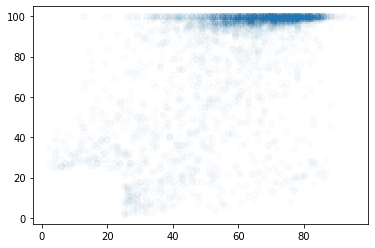

In [86]:
plt.scatter(df.prozentVerlag, df.prozentDpa, alpha=0.02)

In [47]:
#plt.scatter(df.prozentVerlag, df.avgTimeOnPage, alpha = 0.02)

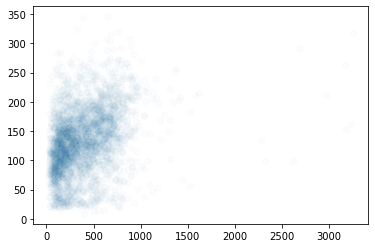

In [89]:
#plt.scatter(df.nr_tokens_publisher, df.avgTimeOnPagePerWordcount, alpha=0.02)
plt.scatter(df.nr_tokens_publisher, df.avgTimeOnPage, alpha=0.02)

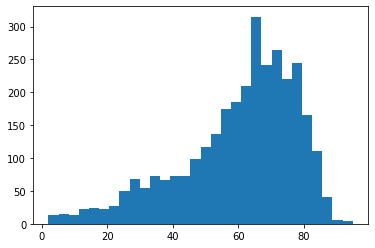

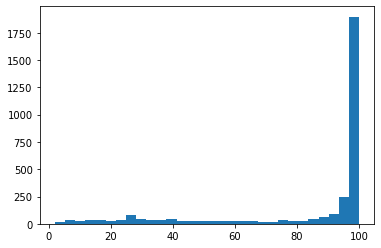

In [90]:
plt.hist(df.prozentVerlag, 30)
plt.show()
plt.hist(df.prozentDpa, 30)
plt.show()

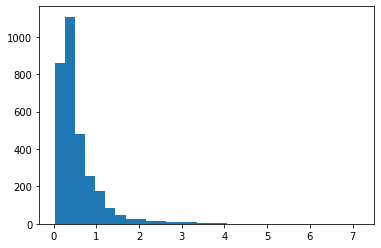

In [93]:
plt.hist(df.avgTimeOnPagePerWordcount, 30)
plt.show()

(-0.5299632446026664, 1.5785799046139365e-226)


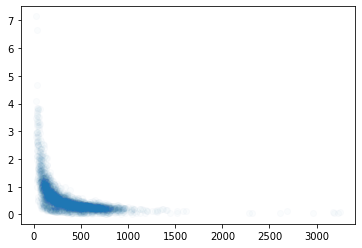

In [94]:
plt.scatter(df.nr_tokens_publisher, df.avgTimeOnPagePerWordcount, alpha = 0.02)
print(st.pearsonr(df.nr_tokens_publisher, df.avgTimeOnPagePerWordcount))

(0.33216056080709144, 1.329162583367683e-81)


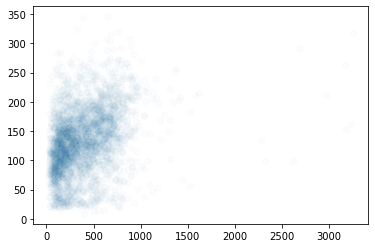

In [95]:
plt.scatter(df.nr_tokens_publisher, df.avgTimeOnPage, alpha = 0.02)
print(st.pearsonr(df.nr_tokens_publisher, df.avgTimeOnPage))

In [58]:
df_cond = utils.get_conditioned_df()

/home/ruecker/miniconda3/envs/GPU/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Shape of raw df: (84887, 71)
Shape of remaining df after conditioning: (7902, 73)


In [59]:
df_cond.ausreisser.value_counts()

nein    7902
Name: ausreisser, dtype: int64

In [60]:
df_cond[show_columns].describe().round(2)

,pageviews,pageviews-exits,stickiness,bounceRate,timeOnPage,avgTimeOnPage,avgTimeOnPagePerWordcount,tokensPerMinute,avgTimeOnPagePerRow,wordcount,zeilen,prozentDpa,prozentVerlag
count,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00,7902.00
mean,959.83,360.40,52.00,17.56,55810.02,150.64,0.49,190.84,4.06,389.99,46.99,96.99,70.75
std,4139.45,912.06,16.09,15.91,169939.96,70.78,0.33,158.40,2.73,201.29,23.88,5.35,9.29
min,56.00,50.00,3.48,0.00,935.00,13.61,0.05,16.03,0.34,76.00,10.00,54.00,50.00
25%,138.00,74.00,39.50,5.38,10016.00,107.12,0.27,94.07,2.22,216.00,26.00,97.00,64.00
50%,263.00,129.00,54.13,12.44,19031.50,144.63,0.41,146.47,3.35,343.00,42.00,99.00,72.00
75%,700.75,312.00,64.88,25.47,44972.00,184.82,0.64,224.34,5.22,554.00,66.00,100.00,78.00
max,219962.00,26895.00,95.52,94.34,6311742.00,1047.72,3.74,1192.77,33.18,1027.00,100.00,100.00,96.00


(array([1.503e+03, 2.545e+03, 1.650e+03, 1.039e+03, 5.380e+02, 2.880e+02,
        1.620e+02, 8.000e+01, 3.900e+01, 2.400e+01, 1.000e+01, 7.000e+00,
        5.000e+00, 6.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.05030312, 0.23488825, 0.41947337, 0.6040585 , 0.78864362,
        0.97322874, 1.15781387, 1.34239899, 1.52698412, 1.71156924,
        1.89615437, 2.08073949, 2.26532462, 2.44990974, 2.63449487,
        2.81907999, 3.00366512, 3.18825024, 3.37283537, 3.55742049,
        3.74200562]),
 <BarContainer object of 20 artists>)

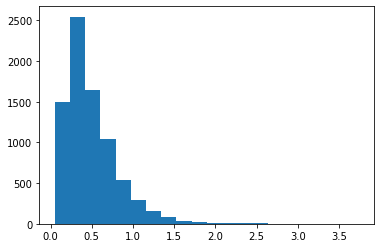

In [63]:
plt.hist(df_cond.avgTimeOnPagePerWordcount, 20)
#plt.hist(df_cond.avgTimeOnPagePerRow, 20)

(-0.6211887000382036, 0.0)


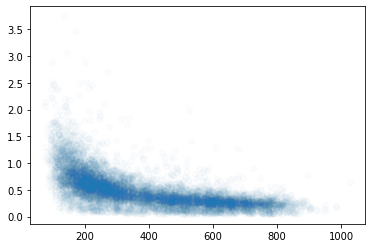

In [67]:
plt.scatter(df_cond.wordcount, df_cond.avgTimeOnPagePerWordcount, alpha = 0.02)
print(st.pearsonr(df_cond.wordcount, df_cond.avgTimeOnPagePerWordcount))

(0.22967704375151346, 4.2018637163680615e-95)


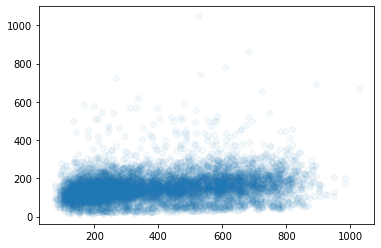

In [65]:
plt.scatter(df_cond.wordcount, df_cond.avgTimeOnPage, alpha = 0.05)
print(st.pearsonr(df_cond.wordcount, df_cond.avgTimeOnPage))

In [70]:
#df_cond.sort_values(by=['avgTimeOnPage'], ascending = False)
#df_cond.sort_values(by=['avgTimeOnPagePerWordcount'], ascending = False)
df_cond.sort_values(by=['avgTimeOnPagePerRow'], ascending = False)

,articleId,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,...,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
24404,2080646,483,393,400,83,41308,NaN,497.686747,17.184265,81.366460,17.184265,100,1,173,19,19,17,9,64,deutschland-und-welt,wirtschaft,NaN,keine-kreuzfahrten-mit-aida-cruises-bis-ende-a...,https://www.noz.de/deutschland-und-welt/wirtsc...,200702-99-648774,15,100,57,dpacat:wi,2020-07-02 14:13:36,...,NaN,Rostock (dpa) - Die Kreuzfahrtreederei Aida Cr...,Keine Kreuzfahrten mit Aida Cruises bis Ende A...,NaN,4,NaN,133,wi,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Rostock,Die Kreuzfahrtreederei Aida Cruises hat ihre F...,146,5.095890,0,10,888,9.0,16.222222,3.742006,33.179116,16.034182,0.560458,83,8.866667,1
22542,2067692,6630,6138,6117,1898,300831,NaN,586.415205,7.737557,92.579186,28.627451,100,1,3071,44,20,20,5,89,deutschland-und-welt,niedersachsen,NaN,usa-verlegen-soldaten-fuer-defender-uebung-nac...,https://www.noz.de/deutschland-und-welt/nieder...,200611-99-387033,21,100,73,dpacat:pl,2020-06-11 10:19:21,...,NaN,Berlin (dpa) - Die USA verlegen für die wegen ...,USA verlegen 600 Soldaten für «Defender»-Übung...,NaN,4,NaN,169,pl,0,NewsML-G2,2020-08-19 13:20:04,1,nein,NOZ,Berlin,Die USA verlegen für die wegen der Corona-Pand...,172,6.145349,0,11,1240,14.0,12.285714,3.469912,27.924534,17.291503,0.472915,513,8.047619,1
28632,2112603,2546,2365,2405,1123,102262,NaN,725.262411,5.538099,92.890809,44.108405,100,1,886,34,20,20,5,79,deutschland-und-welt,vermischtes,NaN,asteroid-rast-dicht-an-der-erde-vorbei,https://www.noz.de/deutschland-und-welt/vermis...,200828-99-348195,27,100,61,dpacat:vm,2020-08-31 11:11:43,...,NaN,Köln (dpa) - Ein mehrfamilienhausgroßer Astero...,Mehrfamilienhaus im Anflug: Asteroid rast dich...,NaN,3,NaN,268,vm,0,NewsML-G2,2020-09-01 03:32:14,1,nein,NOZ,Köln,Ein mehrfamilienhausgroßer Asteroid wird am Di...,279,5.340502,0,10,1789,14.0,19.928571,2.706203,26.861571,22.171286,0.405401,141,9.925926,1
16374,2011569,1681,606,810,187,244624,NaN,280.854191,51.814396,36.049970,11.124331,100,1,606,32,16,3,17,68,deutschland-und-welt,vermischtes,NaN,kampf-gegen-coronavirus-italien-riegelt-norden-ab,https://www.noz.de/deutschland-und-welt/vermis...,200308-99-234103,11,100,82,dpacat:vm,2020-03-08 02:49:17,...,NaN,Rom (dpa) - Im Kampf gegen die Ausbreitung des...,Coronavirus: Italien will weitere Teile im Nor...,NaN,3,NaN,97,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,NOZ,Rom,Im Kampf gegen die Ausbreitung des neuartigen ...,94,6.159574,0,8,682,7.0,13.428571,2.895404,25.532199,20.722497,0.411810,871,8.818182,1
33813,50013701,307,170,206,127,27437,NaN,271.653465,32.899023,55.374593,41.368078,100,1,194,15,16,7,13,51,nrw-region,NaN,NaN,bitte-bleiben-sie-zu-hause,https://www.aachener-zeitung.de/nrw-region/bit...,200410-99-664796,11,100,54,dpacat:pl,2020-04-10 19:22:16,...,NaN,Düsseldorf (dpa) - Die Innenminister der Niede...,Innenminister von NRW und Niederlanden: «Bitte...,NaN,4,NaN,113,pl,0,NewsML-G2,2020-04-21 19:52:18,1,nein,aachener,Düsseldorf,Die Innenminister der Niederlande und Nordrhei...,114,5.798246,0,12,785,6.0,19.000000,2.404013,24.695770,24.958268,0.346055,101,10.272727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55221,5123908

In [65]:
df_cond[df_cond.avgTimeOnPagePerRow > 10]

,articleId,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,sharePageviews,n,nObs,score_pageviews,score_avgTimeOnPage,score_entranceRate,score_stickiness,SCORE,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,zeilen,prozentDpa,prozentVerlag,categoryCode,creationDate,...,teaser,text,titelH1,titelH3,urgency,wikidata,wordcount,category,ratgeber,format,dateLoaded,nLoadAttempts,ausreisser,publisher,city,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPagePerWordcount,avgTimeOnPagePerRow,tokensPerMinute,avgTimeOnPagePerNr_char,pageviews-exits,wordsPerRow,time_class
64,49318053,4339,3089,2997,2317,255559,NaN,190.431446,30.928785,71.191519,53.399401,100,1,1668,39,14,13,13,79,news,panorama,NaN,polizei-ermittelt-nach-vermutetem-diebstahl-vo...,https://www.general-anzeiger-bonn.de/news/pano...,200302-99-153809,15,100,54,dpacat:vm,2020-03-02 12:54:36,...,NaN,Diepholz (dpa) - Die Polizei geht einem mutmaß...,Polizei ermittelt nach vermutetem Diebstahl vo...,NaN,4,NaN,107,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Diepholz,Die Polizei geht einem mutmaßlichen Diebstahl ...,104,6.346154,0,7,775,9.0,11.555556,1.779733,12.695430,33.712920,0.245718,1342,7.133333,1
187,49341973,186,30,60,18,24650,NaN,195.634921,67.741935,16.129032,9.677419,100,1,105,12,14,2,20,48,sport,fussball,NaN,bundesliga-ab-2021-22-zehnmal-am-sonntag-um-19...,https://www.general-anzeiger-bonn.de/sport/fus...,200303-99-169739,17,100,53,dpacat:sp,2020-03-03 13:27:59,...,NaN,Frankfurt/Main (dpa) - Die Fußball-Bundesliga ...,Bundesliga spielt ab 2021/22 zehnmal am Sonnta...,NaN,3,NaN,158,sp,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Frankfurt/Main,Die Fußball-Bundesliga spielt ab der Saison 20...,173,5.803468,0,10,1203,12.0,14.416667,1.238196,11.507937,48.457606,0.162623,126,9.294118,1
310,49364091,182,92,101,65,16184,NaN,199.802469,44.505495,50.549451,35.714286,100,1,102,12,14,5,15,46,news,wirtschaft,ueberregional,real-beschliesst-noch-vor-verkauf-aus-fuer-sie...,https://www.general-anzeiger-bonn.de/news/wirt...,200304-99-185103,18,99,59,dpacat:wi,2020-03-04 12:56:35,...,NaN,Düsseldorf (dpa) - Noch bevor der Verkauf an d...,Real beschließt noch vor Verkauf Aus für siebe...,NaN,3,NaN,160,wi,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Düsseldorf,Noch bevor der Verkauf an den russischen Inves...,158,6.082278,0,9,1134,10.0,15.800000,1.248765,11.100137,48.047454,0.176193,81,8.888889,1
494,49398409,476,338,357,257,28655,NaN,240.798319,25.000000,71.008403,53.991597,100,1,197,19,15,13,11,58,news,panorama,NaN,r-kelly-plaediert-erneut-auf-nicht-schuldig_ai...,https://www.general-anzeiger-bonn.de/news/pano...,200305-99-207182,17,100,60,dpacat:vm,2020-03-05 20:18:50,...,NaN,Chicago (dpa) - Der Prozess gegen den US-Popsä...,R. Kelly plädiert erneut auf nicht schuldig - ...,NaN,4,NaN,127,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Chicago,Der Prozess gegen den US-Popsänger R. Kelly (5...,129,5.798450,0,9,893,10.0,12.900000,1.896050,14.164607,31.644739,0.269651,119,7.470588,1
665,49425867,2660,1383,1485,1004,169183,NaN,143.985532,44.172932,51.992481,37.744361,100,1,669,35,13,5,15,68,news,panorama,NaN,quarantaene-unterkunft-in-china-eingestuerzt_a...,https://www.general-anzeiger-bonn.de/news/pano...,200307-99-229837,13,90,50,dpacat:vm,2020-03-07 22:08:17,...,NaN,Peking (dpa) - Ein als Quarantäne-Unterkunft g...,Quarantäne-Unterkunft in China eingestürzt,NaN,3,NaN,103,vm,0,NewsML-G2,2020-04-21 19:33:11,1,nein,bonn,Peking,Ein als Quarantäne-Unterkunft genutztes Hotel ...,100,6.260000,0,4,737,6.0,16.666667,1.397918,11.075810,42.920979,0.195367,1175,7.923077,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45073,52916049,122,18,42,11,14444,NaN,180.55000

In [66]:
#df.iloc[0] # one example

In [67]:
#utils.show_article(ID=46567279, df = df) #48623259 # 50175481

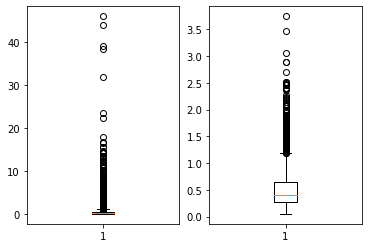

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.avgTimeOnPagePerWordcount)
ax2.boxplot(df_cond.avgTimeOnPagePerWordcount)

fig.show()

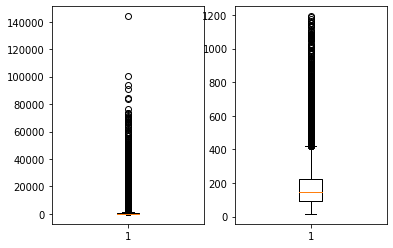

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.tokensPerMinute)
ax2.boxplot(df_cond.tokensPerMinute)

fig.show()

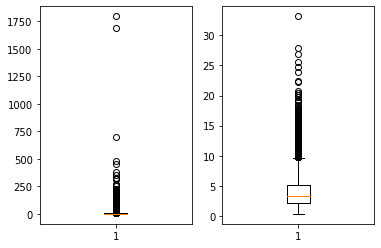

In [69]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.boxplot(df.avgTimeOnPagePerRow)
ax2.boxplot(df_cond.avgTimeOnPagePerRow)

fig.show()

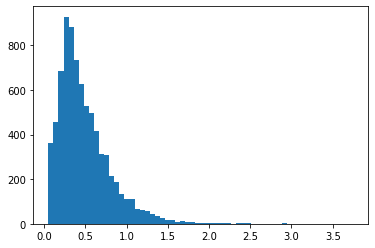

In [70]:
plt.hist(df_cond.avgTimeOnPagePerWordcount, density=False, bins=60)
plt.show()

## looking at genre, rubrik, kategorie, keywords, ...

In [63]:
def get_meta_file_categorical_variable(column_name, seperator="__,__"):
    value_set = set()
    for d in df[column_name]:
        candidates = d.split(seperator)
        for c in candidates:
            value_set.add(c.strip())
    value_df = pd.DataFrame(data=0, index = df.index, columns = sorted(list(value_set)))
    for i, value in df[column_name].items():
        candidates = value.split(seperator)
        for c in candidates:
            value_df.loc[i, c.strip()] = 1
    return value_df

In [22]:
# das funktioniert gerade nicht mehr, da Spalte city nicht mehr da
#df_city = get_meta_file_categorical_variable('city', seperator="/")
#df_city.to_csv('meta_file_city.csv', index=True) # save to file
#print(df_city.sum(axis=0))

In [23]:
df_geoArea = get_meta_file_categorical_variable('geoArea')
#df_geoArea.to_csv('meta_file_geoArea.csv', index=True) # save to file
print(df_geoArea.sum(axis=0))

NameError: name 'get_meta_file_categorical_variable' is not defined

In [65]:
df_genre = get_meta_file_categorical_variable('genre')
df_genre.to_csv('meta_file_genre.csv', index=True) # save to file
print(df_genre.sum(axis=0))

Achtung                           5
Chronologie                       1
Dokumentation                     4
Extra                           122
Faktencheck                      24
Feiertagszusammenfassung         31
Fragen & Antworten              131
Fragen und Antworten             82
Gesamtzusammenfassung           151
Hintergrund                      53
Hintergrund - Chronologie         1
Hintergrund - Dokumentation       5
Hintergrund - Kurzporträt         2
Hintergrund - Pro & Kontra        8
Interview                        87
KORR-Bericht                   1565
Kurzporträt                       2
Meldung                        9955
Nachrichtenüberblick            299
Porträt                         111
Pro und Kontra                    4
Reportage                         5
Themendienst-Gespräch            21
Umfrage                           3
Vorausmeldung                    34
Vorbericht                       92
Vorschau                         21
Wochenendzusammenfassung    

In [66]:
df_rubrik = get_meta_file_categorical_variable('rubrik')
df_rubrik.to_csv('meta_file_rubrik.csv', index=True) # save to file
print(df_rubrik.sum(axis=0))

                          1944
ahr-und-rhein                1
anzeigen                   103
beuel                        1
digitale-welt              610
essen-und-trinken          154
extern-fernsehprogramm       1
familie                    183
fckoeln                     13
fit-und-gesund             267
formel1                    193
fussball                  2868
geld-und-karriere          446
haus-und-garten            298
kindernachrichten           23
kino                       263
koeln-und-rheinland         52
kommentare                  27
kreis-neuwied                1
kultur-und-medien          547
mehr-sport                 873
mode-und-lifestyle          49
news                       357
panorama                  2121
politik                   2122
region-erleben               1
regional                     8
reise                      338
sieg-und-rhein               4
stadt-bonn                  11
telekom-baskets-bonn         4
ticker                    1679
tier-und

In [67]:
df.subRubrik.value_counts() # ?????

                                  11166
ueberregional                      2453
www.general-anzeiger-bonn.de       1292
deutschland                        1126
ausland                             995
steuern-und-recht-und-finanzen      262
studium-und-beruf                   123
advertorials                        103
regional                              5
ga.de                                 4
troisdorf                             3
siegburg                              1
mehr-von-ahr-und-rhein                1
Name: subRubrik, dtype: int64

In [68]:
df_kategorie = get_meta_file_categorical_variable('kategorie')
df_kategorie.to_csv('meta_file_kategorie.csv', index=True) # save to file
print(df_kategorie.sum(axis=0))

bonn          12
corona         1
freizeit     603
https:      1296
meinung       27
news        9090
ratgeber    1473
region        59
sport       4512
verkehr      357
verlag       103
wetter         1
dtype: int64


In [69]:
df_keywords = get_meta_file_categorical_variable('keywords')
df_keywords.to_csv('meta_file_keywords.csv', index=True) # save to file
print(df_keywords.sum(axis=0))

                       4232
#Covid-19                 2
#EU2020DE                 9
#MeToo                   24
#Metoo                    1
                       ... 
Übersicht                 2
Überstunden               2
Überwachungskameras       1
Überweisung               1
übernachten               1
Length: 4433, dtype: int64


In [70]:
df_subject = get_meta_file_categorical_variable('subject')
df_subject.to_csv('meta_file_subject.csv', index=True) # save to file
print(df_subject.sum(axis=0))

              18
Abfall        13
Abrüstung      4
Abtreibung     1
Adel          45
              ..
skak           1
xadrez         6
Ärzte         14
Öl            37
国际象棋           3
Length: 335, dtype: int64


In [72]:
df_category = get_meta_file_categorical_variable('category')
df_category.to_csv('meta_file_category.csv', index=True) # save to file
print(df_category.sum(axis=0))

ku     861
pl    3202
rs       8
sp    5563
vm    5443
wi    2457
dtype: int64


In [105]:
# Liste von category
categories = utils.get_set_of_meta_cat('category')
categories

['ku', 'pl', 'rs', 'sp', 'vm', 'wi']

In [71]:
# Liste von "subjects"
subjects = utils.get_set_of_meta_cat('subject')
subjects

['Unnamed: 1',
 'Abfall',
 'Abrüstung',
 'Abtreibung',
 'Adel',
 'Affären',
 'Agrar',
 'Alternative-Energie',
 'American football',
 'Arbeit',
 'Arbeitgeber',
 'Arbeitslosigkeit',
 'Arbeitsmarkt',
 'Architektur',
 'Archäologie',
 'Armut',
 'Arzneimittel',
 'Atom',
 'Atomenergie',
 'Atomunglück',
 'Auktion',
 'Ausbildung',
 'Ausländer',
 'Ausschreitung',
 'Ausstellungen',
 'Auszeichnungen',
 'Automobilindustrie',
 'Autonomie',
 'Außenhandel',
 'Badminton',
 'Bahn',
 'Bank',
 'Baseball',
 'Basketball',
 'Bau',
 'Beachvolleyball',
 'Behindertensport',
 'Behinderter',
 'Behörden',
 'Bekleidung',
 'Bergbau',
 'Bevölkerung',
 'Biathlon',
 'Bibliotheken',
 'Bildung',
 'Bob',
 'Bogenschießen',
 'Boxen',
 'Brauchtum',
 'Bundesbank',
 'Bundesländer',
 'Bundespräsident',
 'Bundesrat',
 'Bundesregierung',
 'Bundestag',
 'Börse',
 'Bürgerschaft',
 'Chemie',
 'Computer',
 'Dart',
 'Datenschutz',
 'Demonstration',
 'Denkmäler',
 'Dienstleistung',
 'Diplomatie',
 'Doping',
 'Dürre',
 'EU',
 'EZB',
 'E

In [73]:
test = utils.get_articles_where(df, meta_cat = 'subject', label = 'Verbraucher')
test

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48619747,261,42,86,23,25715,,146.942857,67.049808,16.091954,8.812261,news,wirtschaft,ueberregional,deutsche-bahn-informiert-ueber-investitionen-f...,https://www.general-anzeiger-bonn.de/news/wirt...,200129-99-685064,dpacat:wi,Zusammenfassung,Deutschland,,Investitionspläne Deutsche Bahn,"Bahn__,__Bau__,__Verkehr__,__Verbraucher",Die Deutsche Bahn erneuert ihr Gleisnetz - und...,"Berlin (dpa) - Bevor es besser rollt, rollt es...","Baustellen in Sicht: Bahn investiert 12,2 Mill...",,572,wi,"Berlin (dpa) - Bevor es besser rollt, rollt es...",591,5.683587,41,8,4013,39.0,15.153846,0.256893,0.036617,175
48619915,39,14,15,8,3881,,161.708333,61.538462,35.897436,20.512821,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,nur-aufheben-was-man-wirklich-braucht_aid-4861...,https://www.general-anzeiger-bonn.de/ratgeber/...,200123-99-603173,dpacat:vm,KORR-Bericht,Deutschland,"Ratgeber__,__Geld__,__Unterlagen__,__Dokumente...",,"Verbraucher__,__Recht__,__Finanzen","Die Tage werden langsam wieder länger, die Son...","Berlin (dpa/tmn) - Kontoauszüge, Vertragsunter...","Unterlagen sortieren: Nur aufheben, was man wi...",,583,vm,"Berlin (dpa/tmn) - Kontoauszüge, Vertragsunter...",609,5.620690,28,8,4101,38.0,16.026316,0.277373,0.039431,24
48620135,26,12,13,9,2397,,184.384615,50.000000,46.153846,34.615385,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,vor-und-nacherbschaft-kann-aufgeloest-werden_a...,https://www.general-anzeiger-bonn.de/ratgeber/...,200108-99-389215,dpacat:vm,Meldung,Deutschland,"Ratgeber__,__Eltern__,__Kinder__,__Erbauseinan...",,"Verbraucher__,__Recht__,__Familie","Wer Vermögen aufgebaut hat, will es an die näc...",Frankfurt/Main (dpa/tmn) - Vermögen über mehre...,Vor- und Nacherbschaft kann aufgelöst werden,,217,vm,Frankfurt/Main (dpa/tmn) - Vermögen über mehre...,214,6.088785,28,6,1554,17.0,12.588235,0.849699,0.118652,13
48620231,43,6,11,5,4840,,151.250000,74.418605,13.953488,11.627907,ratgeber,tier-und-wir,,getestete-katzenstreu-produkte-bilden-klumpen_...,https://www.general-anzeiger-bonn.de/ratgeber/...,200128-99-667047,dpacat:vm,Meldung,Deutschland,"Haustiere__,__Katzen__,__Katzenklo__,__Katzens...",Stiftung Warentest zu Katzenstreu,"Tier__,__Verbraucher",Katzen sind reinlich und lieben ein sauberes K...,Berlin (dpa/tmn) - Welche Katzenstreu saugt Mi...,Sauberes Geschäft: Getestete Katzenstreu-Produ...,,226,vm,Berlin (dpa/tmn) - Welche Katzenstreu saugt Mi...,230,5.560870,25,6,1542,11.0,20.909091,0.669248,0.098087,32
48620407,23,8,10,6,943,,72.538462,56.521739,34.782609,26.086957,ratgeber,geld-und-karriere,steuern-und-recht-und-finanzen,das-zinsniveau-ist-momentan-traumhaft_aid-4862...,https://www.general-anzeiger-bonn.de/ratgeber/...,200124-99-615613,dpacat:vm,Interview,Deutschland,"Bauen__,__Geld__,__Ratgeber",FMH,"Finanzen__,__Immobilien__,__Zinsen__,__Verbrau...","Die eigenen vier Wände zu finanzieren, war sel...",Frankfurt/Main (dpa/tmn) - Mit steigenden Zins...,Günstige Immobilienkredite: Das Zinsniveau ist...,,337,vm,Frankfurt/Main (dpa/tmn) - Mit steigenden Zins...,335,5.328358,21,6,2172,29.0,11.551724,0.215248,0.033397,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52058961,5,0,1,0,609,,152.250000,80.000000,0.000000,0.000000,news,wirtschaft,ueberregional,deutsche-post-zahl-der-beschwerden-steigt-deut...,https://www.general-anzeiger-bonn.de/news/wirt...,200706-99-693115,dpacat:wi,Meldung,Deutschland,Post,

In [74]:
df.category.unique() # same as categoryCode

array(['vm', 'wi', 'ku', 'pl', 'sp', 'rs'], dtype=object)

In [75]:
df.categoryCode.unique() # same as category

array(['dpacat:vm', 'dpacat:wi', 'dpacat:ku', 'dpacat:pl', 'dpacat:sp',
       'dpacat:rs'], dtype=object)

In [76]:
df.agg({'pageviews': ['min', 'max', 'mean', 'median', 'std'],
        'timeOnPage': ['min', 'max', 'mean', 'median', 'std'],
        'avgTimeOnPage': ['min', 'max', 'mean', 'median', 'std'],
        'avgTimeOnPage/wordcount' : ['min', 'max', 'mean', 'median', 'std'],
        'entrances': ['min', 'max', 'mean', 'median', 'std'],
        'pageviews-exits': ['min', 'max', 'mean', 'median', 'std'],
        'stickiness': ['min', 'max', 'mean', 'median', 'std'],
        'wordcount': ['min', 'max', 'mean', 'median', 'std'], # bereits in den Original-Daten
        'nr_tokens': ['min', 'max', 'mean', 'median', 'std'],
        'nr_tokens_titelH1': ['min', 'max', 'mean', 'median', 'std'],
        'nr_tokens_teaser': ['min', 'max', 'mean', 'median', 'std'],
        'nr_sentences': ['min', 'max', 'mean', 'median', 'std'],
        'mean_sentence_length': ['min', 'max', 'mean', 'median', 'std'],
       })

,pageviews,timeOnPage,avgTimeOnPage,avgTimeOnPage/wordcount,entrances,pageviews-exits,stickiness,wordcount,nr_tokens,nr_tokens_titelH1,nr_tokens_teaser,nr_sentences,mean_sentence_length
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,7.000000,1.000000,0.000000,1.000000,4.619048
max,721352.000000,5.118637e+07,1796.000000,46.051282,469218.000000,224036.000000,100.00000,2881.000000,2865.000000,24.000000,88.000000,269.000000,276.000000
mean,415.752139,2.833672e+04,119.265052,0.521940,226.112410,165.519904,45.53795,323.704289,333.108418,7.953120,13.688719,19.482092,17.542328
median,19.000000,9.970000e+02,99.679305,0.316327,8.000000,9.000000,48.00000,243.000000,251.000000,8.000000,0.000000,15.000000,17.166667
std,7007.237692,4.719911e+05,118.703771,0.877240,4346.413511,2595.727772,21.39111,225.549611,232.116110,1.849765,15.382674,14.099665,4.143778


In [78]:
#df.sort_values(by=['avgTimeOnPage/wordcount'], ascending = False)
df.sort_values(by=['pageviews'], ascending = False)
#df.sort_values(by=['mean_token_length'])
#df.sort_values(by=['avgTimeOnPage'], ascending = False)
#df.sort_values(by=['avgTimeOnPage/nr_char'], ascending = False)
#df.sort_values(by=['pageviews-exits'], ascending = False)
#df.sort_values(by=['stickiness'], ascending = False)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49606519,721352,469218,497316,362331,51186368,,228.473852,31.057791,65.047023,50.229430,news,politik,deutschland,was-nun-in-nrw-verboten-und-was-erlaubt-ist_ai...,https://www.general-anzeiger-bonn.de/news/poli...,200527-99-211285,dpacat:pl,Meldung,Deutschland,"Corona__,__Covid-19",Nordrhein-Westfalen-Plan,"Gesundheit__,__Krankheit__,__Politik",,"Düsseldorf (dpa) - Fußball, Ferienangebote, Ki...",Nordrhein-Westfalen auf Öffnungskurs - Samstag...,,121,pl,"Düsseldorf (dpa) - Fußball, Ferienangebote, Ki...",120,7.041667,0,6,984,7.0,17.142857,1.888214,0.232189,224036
46567279,375158,128227,156740,70453,23780933,,108.878082,58.220270,34.179466,18.779554,wetter,,,das-wochenende-bringt-regen-mit-sich_aid-46567279,https://www.general-anzeiger-bonn.de/wetter/da...,200225-99-64031,dpacat:vm,Meldung,Deutschland,,Deutscher Wetterdienst,Wetter,,Offenbach (dpa) - Kurz vor Ende des meteorolog...,"Meteorologischer Winter endet mit Sturm, Glätt...",,183,vm,Offenbach (dpa) - Kurz vor Ende des meteorolog...,183,5.792350,0,8,1264,10.0,18.300000,0.594962,0.086138,218418
49191513,196206,130006,133680,105846,9961039,,159.310351,31.867527,66.259951,53.946362,news,panorama,,coronavirus-erster-fall-in-nordhrein-westfalen...,https://www.general-anzeiger-bonn.de/news/pano...,200226-99-87891,dpacat:vm,Zusammenfassung,"Deutschland__,__China","Krankheiten__,__Wissenschaft",,Gesundheit,Das Coronavirus wird vermehrt in Deutschland n...,Koblenz (dpa) - Erstmals haben Experten auch i...,Coronavirus-Infektion erstmals in Rheinland-Pf...,,373,vm,Koblenz (dpa) - Erstmals haben Experten auch i...,388,6.319588,22,5,2880,23.0,16.869565,0.427105,0.055316,62526
50717541,155974,139094,140285,125977,1978470,,126.105552,10.058728,89.177683,80.767949,region,sieg-und-rhein,troisdorf,ermittler-pruefen-nach-angriff-auf-polizisten-...,https://www.general-anzeiger-bonn.de/region/si...,200512-99-35688,dpacat:vm,Meldung,Deutschland,"Corona__,__Covid-19",Mitteilung der Polizei vom Sonntag,"Gesundheit__,__Krankheit__,__Kriminalität__,__...",,Düsseldorf (dpa) - Zwei Männer wollen im Super...,Polizisten nach Masken-Streit verletzt: Verdac...,,280,vm,Düsseldorf (dpa) - Zwei Männer wollen im Super...,287,5.609756,0,7,1930,15.0,19.133333,0.450377,0.065340,15689
49566055,118702,76791,81364,61359,8501442,,227.688735,31.455241,64.692255,51.691631,news,panorama,,landesregierung-beschliesst-weitere-massnahmen...,https://www.general-anzeiger-bonn.de/news/pano...,200315-99-336723,dpacat:vm,Meldung,,Covid-19,,"Gesundheit__,__Krankheit__,__Wissenschaft",,Düsseldorf (dpa) - Die nordrhein-westfälische ...,NRW-Landesregierung beschließt weitere Maßnahm...,,214,vm,Düsseldorf (dpa) - Die nordrhein-westfälische ...,217,6.958525,0,6,1758,11.0,19.727273,1.063966,0.129516,37338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50044935,1,1,1,1,0,,0.000000,0.000000,100.000000,100.000000,news,ticker,,dfl-verschiebt-entscheidung-ueber-bundesliga-f...,https://www.general-anzeiger-bonn.de/news/tick...,200414-99-695852,dpacat:sp,Meldung,Deutschland,"DFL__,__Bundesliga__,__Corona__,__Covid-19",,"Fußball__,__Gesundheit__,__Krankheit",,Frankfurt/Main (dpa) - Die Deutsche Fußball Li...,DFL verschiebt Entscheidung über Bundesliga-Fo...,,43,sp,Frankfurt/Main (dpa) - Die Deutsche Fußball Li...,42,6.309524,0,5,314,3.0,14.000000,0.000000,0.000000,0
51976875,1,1,1,1,0,,0.000000,0.000000,100.000000,100.000000,https:,,www.general-anzeig

In [79]:
df[['pageviews', 'entrances', 'exits', 'bounces', 'timeOnPage', 'avgTimeOnPage', 'avgTimeOnPage/wordcount', 'stickiness', 'nr_tokens', 'nr_tokens_teaser', 'nr_tokens_titelH1']].describe().round(2)

,pageviews,entrances,exits,bounces,timeOnPage,avgTimeOnPage,avgTimeOnPage/wordcount,stickiness,nr_tokens,nr_tokens_teaser,nr_tokens_titelH1
count,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00,17534.00
mean,415.75,226.11,250.23,171.70,28336.72,119.27,0.52,45.54,333.11,13.69,7.95
std,7007.24,4346.41,4615.88,3378.83,471991.07,118.70,0.88,21.39,232.12,15.38,1.85
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.00,0.00,1.00
25%,8.00,4.00,4.00,3.00,157.00,40.92,0.16,33.33,166.00,0.00,7.00
50%,19.00,8.00,9.00,6.00,997.00,99.68,0.32,48.00,251.00,0.00,8.00
75%,56.00,22.00,27.00,15.00,4128.75,163.95,0.60,60.94,480.00,29.00,9.00
max,721352.00,469218.00,497316.00,362331.00,51186368.00,1796.00,46.05,100.00,2865.00,88.00,24.00


(array([1.424e+03, 5.237e+03, 3.646e+03, 1.575e+03, 1.639e+03, 1.634e+03,
        1.043e+03, 6.450e+02, 3.640e+02, 1.540e+02, 5.600e+01, 4.000e+01,
        1.800e+01, 9.000e+00, 1.200e+01, 7.000e+00, 3.000e+00, 7.000e+00,
        8.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([   7. ,  102.8,  198.6,  294.4,  390.2,  486. ,  581.8,  677.6,
         773.4,  869.2,  965. , 1060.8, 1156.6, 1252.4, 1348.2, 1444. ,
        1539.8, 1635.6, 1731.4, 1827.2, 1923. , 2018.8, 2114.6, 2210.4,
        2306.2, 2402. , 2497.8, 2593.6, 2689.4, 2785.2, 2881. ]),
 <a list of 30 Patch objects>)

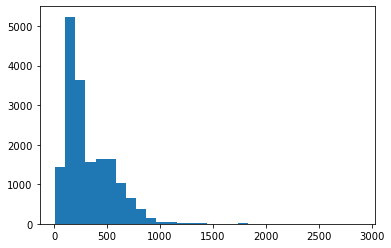

In [80]:
plt.hist(df.wordcount, density=False, bins=30)

(array([7495., 3069., 1509., 1000.,  577.,  387.,  323.,  257.,  179.,
         150.,  120.,  133.,  109.,   88.,   66.,   64.,   56.,   43.,
          51.,   48.,   43.,   42.,   48.,   41.,   33.,   32.,   39.,
          28.,   26.,   32.]),
 array([  1.        ,  14.26666667,  27.53333333,  40.8       ,
         54.06666667,  67.33333333,  80.6       ,  93.86666667,
        107.13333333, 120.4       , 133.66666667, 146.93333333,
        160.2       , 173.46666667, 186.73333333, 200.        ,
        213.26666667, 226.53333333, 239.8       , 253.06666667,
        266.33333333, 279.6       , 292.86666667, 306.13333333,
        319.4       , 332.66666667, 345.93333333, 359.2       ,
        372.46666667, 385.73333333, 399.        ]),
 <a list of 30 Patch objects>)

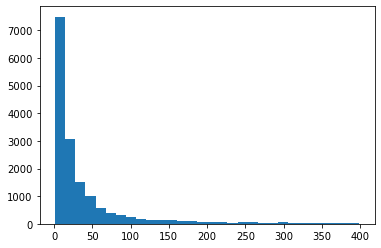

In [83]:
#plt.hist(df.pageviews, density=False, bins=30)
plt.hist(df[df.pageviews <400].pageviews, density=False, bins=30)

# man sieht: die allermeisten Artikel haben 0-50 pageviews, es gibt eber riesige Ausreißer nach oben, wie damit umgehen?

(array([4094., 1352.,  928.,  689.,  562.,  501.,  434.,  386.,  368.,
         333.,  281.,  277.,  265.,  254.,  258.,  199.,  195.,  180.,
         175.,  152.,  166.,  125.,  126.,  116.,  119.,  109.,  108.,
         122.,   87.,  102.]),
 array([   0.        ,  133.23333333,  266.46666667,  399.7       ,
         532.93333333,  666.16666667,  799.4       ,  932.63333333,
        1065.86666667, 1199.1       , 1332.33333333, 1465.56666667,
        1598.8       , 1732.03333333, 1865.26666667, 1998.5       ,
        2131.73333333, 2264.96666667, 2398.2       , 2531.43333333,
        2664.66666667, 2797.9       , 2931.13333333, 3064.36666667,
        3197.6       , 3330.83333333, 3464.06666667, 3597.3       ,
        3730.53333333, 3863.76666667, 3997.        ]),
 <a list of 30 Patch objects>)

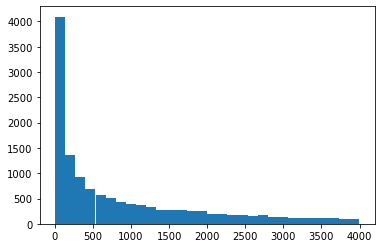

In [84]:
plt.hist(df[df.timeOnPage <4000].timeOnPage, density=False, bins=30)

(array([5603., 4231., 1897., 1057.,  713.,  508.,  333.,  297.,  217.,
         162.,  159.,  115.,  102.,   98.,   60.,   64.,   58.,   59.,
          47.,   57.,   50.,   38.,   25.,   35.,   23.,   24.,   28.,
          31.,   23.,   17.]),
 array([  0.        ,   4.96666667,   9.93333333,  14.9       ,
         19.86666667,  24.83333333,  29.8       ,  34.76666667,
         39.73333333,  44.7       ,  49.66666667,  54.63333333,
         59.6       ,  64.56666667,  69.53333333,  74.5       ,
         79.46666667,  84.43333333,  89.4       ,  94.36666667,
         99.33333333, 104.3       , 109.26666667, 114.23333333,
        119.2       , 124.16666667, 129.13333333, 134.1       ,
        139.06666667, 144.03333333, 149.        ]),
 <a list of 30 Patch objects>)

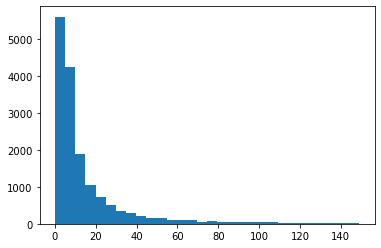

In [85]:
plt.hist(df[df.entrances <150].entrances, density=False, bins=30)

(array([2032., 1171., 1097., 1046., 1075.,  938.,  935.,  977.,  943.,
         929.,  897.,  899.,  700.,  652.,  564.,  429.,  376.,  300.,
         228.,  194.,  151.,  123.,   90.,   85.,   84.,   48.,   67.,
          40.,   30.,   30.]),
 array([  0.        ,  13.32745098,  26.65490196,  39.98235294,
         53.30980392,  66.6372549 ,  79.96470588,  93.29215686,
        106.61960784, 119.94705882, 133.2745098 , 146.60196078,
        159.92941176, 173.25686275, 186.58431373, 199.91176471,
        213.23921569, 226.56666667, 239.89411765, 253.22156863,
        266.54901961, 279.87647059, 293.20392157, 306.53137255,
        319.85882353, 333.18627451, 346.51372549, 359.84117647,
        373.16862745, 386.49607843, 399.82352941]),
 <a list of 30 Patch objects>)

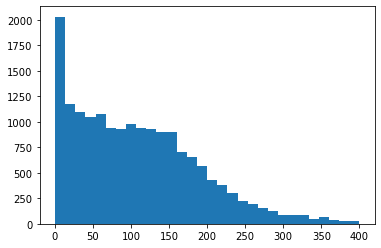

In [86]:
plt.hist(df[df.avgTimeOnPage <400].avgTimeOnPage, density=False, bins=30)

(array([1.6582e+04, 6.9800e+02, 1.5700e+02, 4.4000e+01, 2.2000e+01,
        1.8000e+01, 2.0000e+00, 5.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.        ,  1.53504274,  3.07008547,  4.60512821,  6.14017094,
         7.67521368,  9.21025641, 10.74529915, 12.28034188, 13.81538462,
        15.35042735, 16.88547009, 18.42051282, 19.95555556, 21.49059829,
        23.02564103, 24.56068376, 26.0957265 , 27.63076923, 29.16581197,
        30.7008547 , 32.23589744, 33.77094017, 35.30598291, 36.84102564,
        38.37606838, 39.91111111, 41.44615385, 42.98119658, 44.51623932,
        46.05128205]),
 <a list of 30 Patch objects>)

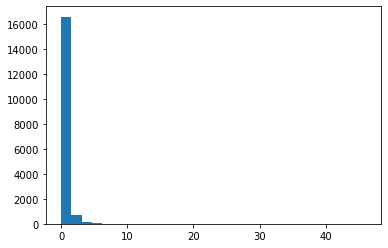

In [87]:
plt.hist(df['avgTimeOnPage/wordcount'], density=False, bins=30)

(array([1.651e+04, 7.430e+02, 1.730e+02, 5.500e+01, 1.800e+01, 1.600e+01,
        9.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.20502283, 0.41004566, 0.61506849, 0.82009132,
        1.02511416, 1.23013699, 1.43515982, 1.64018265, 1.84520548,
        2.05022831, 2.25525114, 2.46027397, 2.6652968 , 2.87031963,
        3.07534247, 3.2803653 , 3.48538813, 3.69041096, 3.89543379,
        4.10045662, 4.30547945, 4.51050228, 4.71552511, 4.92054795,
        5.12557078, 5.33059361, 5.53561644, 5.74063927, 5.9456621 ,
        6.15068493]),
 <a list of 30 Patch objects>)

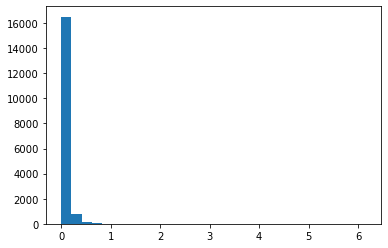

In [88]:
plt.hist(df['avgTimeOnPage/nr_char'], density=False, bins=30)

In [ ]:
import seaborn as sns
sns.boxplot(x=df.pageviews)

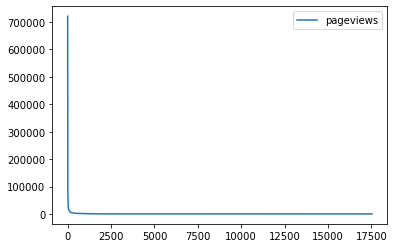

In [89]:
# sorted to see it better
#plt.plot(df.sort_values(by=['timeOnPage'], ascending = False).timeOnPage.to_numpy(), label = 'timeOnPage')
plt.plot(df.sort_values(by=['pageviews'], ascending = False).pageviews.to_numpy(), label = 'pageviews')
plt.legend()

## inspecting avgTimeOnPage

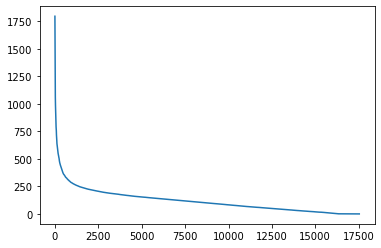

In [90]:
plt.plot(df.sort_values(by=['avgTimeOnPage'], ascending = False).avgTimeOnPage.to_numpy(), label = 'avgTimeOnPage')

In [91]:
df.sort_values(by=['avgTimeOnPage'], ascending = False).head(10)

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
49364595,3,2,2,2,1796,,1796.0,33.333333,66.666667,66.666667,news,ticker,,ramelow-faellt-bei-ministerpraesidentenwahl-im...,https://www.general-anzeiger-bonn.de/news/tick...,200303-99-169093,dpacat:pl,Meldung,Deutschland,Ministerpräsident,,"Landtag__,__Regierung",,Erfurt (dpa) - Bei der Wahl des Thüringer Mini...,Ramelow fällt bei Ministerpräsidentenwahl im e...,,39,pl,Erfurt (dpa) - Bei der Wahl des Thüringer Mini...,38,6.526316,0,8,292,2.0,19.000000,46.051282,6.150685,1
51890351,3,2,2,2,1755,,1755.0,33.333333,66.666667,66.666667,news,digitale-welt,,unilever-stoppt-werbung-bei-facebook-und-twitt...,https://www.general-anzeiger-bonn.de/news/digi...,200626-99-581013,dpacat:pl,Zusammenfassung,USA,Facebook,"StopHateforProfit-Website__,__Tweet von The No...","Internet__,__Gesellschaft__,__Konsumgüter__,__...",Facebook und Twitter stehen wegen einer Flut a...,London/New York (dpa) - Facebook gerät wegen s...,Boykott weitet sich aus: Unilever und Honda st...,,462,pl,London/New York (dpa) - Facebook gerät wegen s...,461,6.381779,27,9,3464,25.0,18.440000,3.798701,0.506640,1
52026159,2,0,1,0,1743,,1743.0,50.000000,0.000000,0.000000,news,wirtschaft,ueberregional,commerzbank-mit-fuehrungsvakuum-wer-wird-zielk...,https://www.general-anzeiger-bonn.de/news/wirt...,200706-99-687756,dpacat:wi,Zusammenfassung,Deutschland,,"adhoc-Mitteilung Commerzbank 3.7.2020__,__Mitt...","Bank__,__Personalien",Die Commerzbank braucht rasch eine neue Führun...,Frankfurt/Main (dpa) - Die Commerzbank bemüht ...,Hängepartie oder Befreiungsschlag? Commerzbank...,,757,wi,Frankfurt/Main (dpa) - Die Commerzbank bemüht ...,786,6.118321,20,7,5665,39.0,20.153846,2.302510,0.307679,1
51680351,2,1,1,1,1720,,1720.0,50.000000,50.000000,50.000000,https:,,www.general-anzeiger-bonn.de,wo-beschaeftigte-im-arbeitsvertrag-minusstunde...,https://www.general-anzeiger-bonn.de/https://w...,200616-99-442082,dpacat:vm,Meldung,Deutschland,"Beruf__,__Ratgeber__,__Recht__,__Studierende__...",DGB Jugend mit Infos zur Arbeitszeit,Arbeit,In der Corona-Krise haben unter anderem Studie...,Berlin (dpa/tmn) - Vereinbarungen zu sogenannt...,Gleitzeit und Co.: Infos zu Minusstunden im Ve...,,196,vm,Berlin (dpa/tmn) - Vereinbarungen zu sogenannt...,194,6.716495,28,9,1526,11.0,17.636364,8.775510,1.127130,1
49958489,5,4,4,3,1693,,1693.0,20.000000,80.000000,60.000000,sport,fussball,,sc-freiburg-mit-training-in-zweiergruppen_aid-...,https://www.general-anzeiger-bonn.de/sport/fus...,200407-99-619960,dpacat:sp,Meldung,Deutschland,"Bundesliga__,__Freiburg__,__Corona__,__Covid-19","Kader SC Freiburg__,__Spielplan SC Freiburg__,...","Fußball__,__Krankheit__,__Gesundheit",,Freiburg (dpa) - In Zweiergruppen und ohne Zwe...,SC Freiburg mit Training in Zweiergruppen,,116,sp,Freiburg (dpa) - In Zweiergruppen und ohne Zwe...,117,6.564103,0,6,895,7.0,16.714286,14.594828,1.891620,1
49635683,1,1,0,0,1688,,1688.0,100.000000,100.000000,0.000000,news,ticker,,corona-ezb-legt-notkaufprogramm-in-hoehe-von-7...,https://www.general-anzeiger-bonn.de/news/tick...,200319-99-386371,dpacat:wi,Meldung,International,,,"Gesundheit__,__Krankheit__,__Finanzen__,__EZB",,Frankfurt/Main (dpa) - Im Kampf gegen wirtscha...,Corona: EZB legt Notkaufprogramm in Höhe von 7...,,44,wi,Frankfurt/Main (dpa) - Im Kampf gegen wirtscha...,43,6.418605,0,11,325,2.0,21.500000,38.363636,5.193846,1
49862367,3,2,2,2,1683,,1683.0,33.333333,66.666667,66.666667,sport,mehr-sport,,ruder-em-verschoben-neuer-termin-im-herbst-gep...,https://www.general-anzeiger-bonn.de/sport/meh...,200

In [92]:
# just take articles with >= 10 pageviews and with ...
df_cut = df.loc[(df['pageviews'] >= 20) ]
#                & (df['avgTimeOnPage/wordcount'] <= 1)
#                & (df['avgTimeOnPage/wordcount'] >= 0.1)]

In [93]:
df_cut

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
46567279,375158,128227,156740,70453,23780933,,108.878082,58.220270,34.179466,18.779554,wetter,,,das-wochenende-bringt-regen-mit-sich_aid-46567279,https://www.general-anzeiger-bonn.de/wetter/da...,200225-99-64031,dpacat:vm,Meldung,Deutschland,,Deutscher Wetterdienst,Wetter,,Offenbach (dpa) - Kurz vor Ende des meteorolog...,"Meteorologischer Winter endet mit Sturm, Glätt...",,183,vm,Offenbach (dpa) - Kurz vor Ende des meteorolog...,183,5.792350,0,8,1264,10.0,18.300000,0.594962,0.086138,218418
48612935,32,9,11,6,2294,,109.238095,65.625000,28.125000,18.750000,news,panorama,,weinstein-prozess-zeugin-bestaetigt-mimi-haley...,https://www.general-anzeiger-bonn.de/news/pano...,200128-99-659558,dpacat:vm,KORR-Bericht,USA,,,"Prozess (Gericht)__,__Kriminalität__,__Gesells...",Im größten Prozess der MeToo-Ära stehen zwei F...,"New York (dpa) - Harvey Weinstein blickt auf, ...",Rotunno vs. Illuzzi: Zwei Frauen im Zentrum de...,,642,vm,"New York (dpa) - Harvey Weinstein blickt auf, ...",683,5.672035,36,9,4636,30.0,22.766667,0.170153,0.023563,21
48619167,350,44,82,25,45996,,171.626866,76.571429,12.571429,7.142857,news,politik,ausland,palaestinenser-weisen-trumps-nahost-plan-schar...,https://www.general-anzeiger-bonn.de/news/poli...,200128-99-675159,dpacat:pl,Zusammenfassung,"USA__,__Palästinensische Autonomiegebiete__,__...",Nahost,,"Konflikte__,__Internationale Beziehung",Der Nahost-Plan von US-Präsident Trump stellt ...,Washington (dpa) - Die Palästinenserführung ha...,Palästinenser weisen Trumps Nahost-Plan scharf...,,959,pl,Washington (dpa) - Die Palästinenserführung ha...,998,6.095190,35,6,7167,59.0,16.915254,0.178964,0.023947,268
48619407,794,333,392,225,66806,,166.184080,50.629723,41.939547,28.337531,news,panorama,,zahl-der-virus-faelle-steigt-auf-mehr-als-6000...,https://www.general-anzeiger-bonn.de/news/pano...,200129-99-687125,dpacat:vm,Zusammenfassung,"China__,__Deutschland",,"Gesundheitskommission__,__WHO__,__Video mit In...","Krankheit__,__Gesundheit__,__Wissenschaft","Hauptsächlich, aber nicht nur in China breitet...",Peking/München (dpa) - Gute Nachrichten von de...,Coronavirus breitet sich aus - Patienten in De...,,874,vm,Peking/München (dpa) - Gute Nachrichten von de...,893,6.104143,29,10,6435,53.0,16.849057,0.190142,0.025825,402
48619435,28,10,12,7,3684,,230.250000,57.142857,35.714286,25.000000,news,wirtschaft,ueberregional,rekordzahlen-fuer-apple-im-weihnachtsgeschaeft...,https://www.general-anzeiger-bonn.de/news/wirt...,200128-99-675269,dpacat:wi,Zusammenfassung,USA,Apple,Apple zum Geschäft im vergangenen Quartal,"Computer__,__Internet__,__Telekommunikation",Das iPhone-Geschäft wächst nach einer längeren...,Cupertino (dpa) - Apple hat das vergangene Wei...,Rekordzahlen für Apple im Weihnachtsgeschäft,,245,wi,Cupertino (dpa) - Apple hat das vergangene Wei...,242,5.809917,29,5,1674,16.0,15.125000,0.939796,0.137545,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52098597,33,14,15,7,2968,,164.888889,54.545455,42.424242,21.212121,news,panorama,,erneut-demonstrationen-und-unruhen-in-serbien_...,https://www.general-anzeiger-bonn.de/news/pano...,200709-99-727676,dpacat:pl,Zusammenfassung,Serbien,"Regierung__,__Polizei__,__Gesundheit__,__Krank...","Bericht bei rs.n1info.com, Serb.__,__Bericht b...",Demonstration,"Bis Anfang Mai galt in Serbien ein Lockdown, d...",Belgrad (dpa) - Die inkonsequente Politik des ...,Unruhen in Serbien wegen Cor

In [94]:
df_cut_sorted = df_cut.sort_values(by = ['stickiness'], ascending = False)
df_cut_sorted

,pageviews,entrances,exits,bounces,timeOnPage,conversions,avgTimeOnPage,stickiness,entranceRate,bounceRate,kategorie,rubrik,subRubrik,titel,pagePath,dpaGuid,categoryCode,genre,geoArea,keywords,links,subject,teaser,text,titelH1,titelH3,wordcount,category,text_preprocessed,nr_tokens,mean_token_length,nr_tokens_teaser,nr_tokens_titelH1,nr_char,nr_sentences,mean_sentence_length,avgTimeOnPage/wordcount,avgTimeOnPage/nr_char,pageviews-exits
articleId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51206017,26,1,1,1,1176,,47.040000,96.153846,3.846154,3.846154,ratgeber,familie,,regelmaessige-bewegung-beugt-stuerzen-im-alter...,https://www.general-anzeiger-bonn.de/ratgeber/...,200518-99-97597,dpacat:vm,Zusammenfassung,Deutschland,"Senioren__,__Gesundheit__,__Ratgeber__,__Beweg...",Tipps gegen Bewegungsmangel,Familie,Die Angst vor dem Hinfallen kann ältere Mensch...,Berlin (dpa/tmn) - Bewegung ist gut für den Kö...,Im Alter: Regelmäßige Bewegung beugt Stürzen vor,,269,vm,Berlin (dpa/tmn) - Bewegung ist gut für den Kö...,265,5.894340,27,7,1878,20.0,13.250000,0.174870,0.025048,25
49402415,25,1,1,1,414,,17.250000,96.000000,4.000000,4.000000,ratgeber,essen-und-trinken,,lidl-ruft-reispfanne-zurueck_aid-49402415,https://www.general-anzeiger-bonn.de/ratgeber/...,200305-99-207855,dpacat:vm,Meldung,Deutschland,Rückrufe,,"Lebensmittel__,__Verbraucher",,Neckarsulm (dpa) - Wegen der nicht deklarierte...,Lidl ruft Reispfanne wegen nicht deklarierten ...,,94,vm,Neckarsulm (dpa) - Wegen der nicht deklarierte...,95,6.515789,0,8,728,5.0,19.000000,0.183511,0.023695,24
51240359,26,2,2,2,509,,21.208333,92.307692,7.692308,7.692308,news,kultur-und-medien,ueberregional,kupferstich-kabinett-richtet-jubilaeumsschau-e...,https://www.general-anzeiger-bonn.de/news/kult...,200515-99-74788,dpacat:ku,Meldung,Deutschland,,,"Museen__,__Kunst",,Dresden (dpa) - Mit Verspätung wegen Corona ho...,Kupferstich-Kabinett Dresden richtet Jubiläums...,,262,ku,Dresden (dpa) - Mit Verspätung wegen Corona ho...,268,5.455224,0,5,1754,12.0,22.333333,0.080948,0.012091,24
51237519,24,2,2,1,1154,,52.454545,91.666667,8.333333,4.166667,freizeit,kino,,roland-emmerich-dreht-sci-fi-film-mit-halle-be...,https://www.general-anzeiger-bonn.de/freizeit/...,200519-99-118931,dpacat:ku,Meldung,"USA__,__Deutschland",,"Variety__,__Hollywood Reporter","Film__,__Leute",,Los Angeles (dpa) - Hollywood-Regisseur Roland...,Roland Emmerich dreht Sci-Fi-Film «Moonfall» m...,,178,ku,Los Angeles (dpa) - Hollywood-Regisseur Roland...,200,5.320000,0,10,1269,10.0,20.000000,0.294688,0.041335,22
49908709,24,2,2,1,1397,,63.500000,91.666667,8.333333,4.166667,news,panorama,,mehr-als-83700-corona-nachweise-in-deutschland...,https://www.general-anzeiger-bonn.de/news/pano...,200403-99-586782,dpacat:vm,Meldung,Deutschland,"Corona__,__Covid-19__,__Fallzahlen","Zahlen des RKI__,__Tabelle: Infektionszahlen n...","Gesundheit__,__Krankheit__,__Wissenschaft",,Berlin (dpa) - In Deutschland sind bis Freitag...,Mehr als 85 100 Corona-Nachweise in Deutschlan...,,160,vm,Berlin (dpa) - In Deutschland sind bis Freitag...,161,5.807453,0,11,1118,10.0,16.100000,0.396875,0.056798,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50405065,28,27,27,26,358,,358.000000,3.571429,96.428571,92.857143,https:,,www.general-anzeiger-bonn.de,patrick-esume-und-der-hsv-arbeiten-weiter-zusa...,https://www.general-anzeiger-bonn.de/https://w...,200506-99-956148,dpacat:sp,Meldung,Deutschland,"2. Bundesliga__,__Hamburger SV","Mitteilung Hamburger SV__,__Homepage Hamburger...",Fußball,,Hamburg (dpa) - Der Hamburger SV und Patrick E...,Patrick Esume und der HSV arbeiten weiter zusa...,,124,sp,Hamburg (dpa) - Der Hamburger SV und Patrick E...,129,5.937984,0,8,909,6.0,21.500000,2.887097,0.393839,1
51917199,20055,19378,19358,18920,89507,,128.417504,3.475443,96.624283,94.340563,https:,,www.general-anzeiger-bonn.de,corona-kennziffer-im-kreis-guetersloh-noch-deu..

In [95]:
for i in [0,1,2,3,4,5,400,401,402]:
    print(df_cut_sorted.iloc[i]['pageviews-exits'])
    print(df_cut_sorted.iloc[i]['avgTimeOnPage/wordcount'])
    print(df_cut_sorted.iloc[i]['stickiness'])
    print(df_cut_sorted.iloc[i].text_preprocessed)

25
0.17486988847583643
96.1538461538462
Berlin (dpa/tmn) - Bewegung ist gut für den Körper - das gilt auch im Alter. Gerade wer unsicher beim Gehen ist, sollte regelmäßig aktiv sein, um seine Beweglichkeit und seine Koordination zu trainieren. Sonst lassen die Muskelkraft und der Gleichgewichtssinn nach. Das erhöht etwa die Gefahr von Stürzen, warnt das Zentrum für Qualität in der Pflege (ZQP). Wer stürzt, ist durch diese Erfahrung eventuell verunsichert und bewegt sich noch weniger. Das könne zu einem Teufelskreis werden. Darum sind auch Angehörige gefragt. Sie sollten Ältere dazu motivieren, noch möglichst viel selbst zu schaffen - sich anziehen zum Beispiel. Das fördert die Selbstständigkeit und zugleich den Bewegungsradius. Wichtig ist: nicht überreden, drängen oder gar zwingen. Es muss freiwillig passieren. Augen und Ohren regelmäßig untersuchen lassen Wer gut sieht und hört, ist sicherer unterwegs. Aus dem Grund rät das ZQP, Brillen und Hörgeräte stets zu nutzen und die Augen und

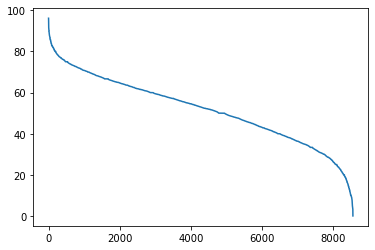

In [96]:
#plt.plot(df_cut.sort_values(by=['avgTimeOnPage/wordcount'], ascending = False)['avgTimeOnPage/wordcount'].to_numpy(), label = 'avgTimeOnPage/wordcount')
plt.plot(df_cut.sort_values(by=['stickiness'], ascending = False)['stickiness'].to_numpy(), label = 'stickiness')

(array([4.131e+03, 2.670e+03, 9.920e+02, 3.750e+02, 1.660e+02, 7.600e+01,
        4.000e+01, 2.900e+01, 2.600e+01, 1.500e+01, 9.000e+00, 9.000e+00,
        2.000e+00, 6.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.        ,  0.38699187,  0.77398374,  1.16097561,  1.54796748,
         1.93495935,  2.32195122,  2.70894309,  3.09593496,  3.48292683,
         3.8699187 ,  4.25691057,  4.64390244,  5.03089431,  5.41788618,
         5.80487805,  6.19186992,  6.57886179,  6.96585366,  7.35284553,
         7.7398374 ,  8.12682927,  8.51382114,  8.90081301,  9.28780488,
         9.67479675, 10.06178862, 10.44878049, 10.83577236, 11.22276423,
        11.6097561 ]),
 <a list of 30 Patch objects>)

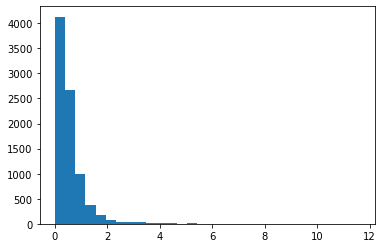

In [97]:
plt.hist(df_cut['avgTimeOnPage/wordcount'], density=False, bins=30)

(array([1189.,  308.,  520., 1255., 1801., 1313., 2067., 2339., 1885.,
        1833., 1694.,  705.,  356.,  104.,  165.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ]),
 <a list of 15 Patch objects>)

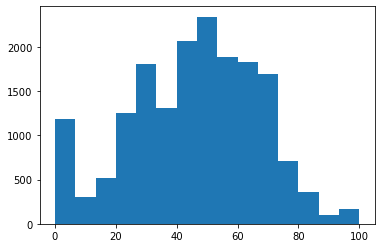

In [98]:
plt.hist(df['stickiness'], density=False, bins=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc33023bad0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc330241590>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc33023b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc330247090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3302475d0>],
 'means': []}

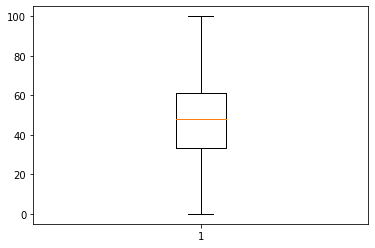

In [99]:
#plt.boxplot(df_cut['avgTimeOnPage/wordcount'])
#plt.boxplot(df_cut['pageviews'])
plt.boxplot(df.stickiness)

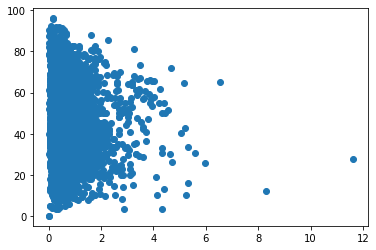

In [103]:
plt.scatter(df_cut['avgTimeOnPage/wordcount'], df_cut.stickiness)

In [108]:
# zeigt TimeOnPage/wordcount aufgespalten nach xxx-Kategorien
for c in categories:
    print(c)
    tmp = utils.get_articles_where(df=df, meta_cat = 'category', label = c)
    print(np.mean(tmp['avgTimeOnPage/wordcount']))
    print(np.mean(tmp['stickiness']))

ku
0.4646175975162086
46.39733048910267
pl
0.4905542323481037
49.95968346389281
rs
0.5262159718905302
53.2841688311815
sp
0.5110934389137913
36.253692877291606
vm
0.5479846205334761
52.05610639732522
wi
0.5497739511003324
46.0303041350899


Bedeutung der Ressortkürzel:
* pl Politik
* wi Wirtschaft
* ku Kultur
* sp Sport
* vm Vermischtes
* rs Redaktioneller Service, wie Kurzdienst, Hinweise, etc.

Kommentar:
* ich glaube: avgTimeOnPage = timeOnPage/(pageviews - exits)
* stickiness = (pageviews-exits)/pageviews (wieviele der Besucher bleiben beim publisher?)